# Import Required Libraries
Import the necessary libraries, including pandas and scikit-learn.

In [90]:
# Import Required Libraries
# %pip install numpy==1.26.4
# %pip install --upgrade pandas tensorflow scikit-learn
# %pip uninstall scipy scikit-learn -y
# %pip install --no-cache-dir scipy scikit-learn
# %pip uninstall gensim scipy -y
# %pip install scipy==1.13.0 gensim==4.3.3
# %pip install seaborn --upgrade


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from IPython.display import Markdown
import seaborn as sns
import numpy as np

# Load Dataset
Load the dataset into a pandas DataFrame.

In [91]:
# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"  # Replace with your dataset file path
df = pd.read_csv(file_path)  # Load the dataset into a pandas DataFrame

# Display the first few rows of the DataFrame
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,01-01-2015,99635.030,1382.937923,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,02-01-2015,129606.010,1787.848379,121082.015,38.837661,8523.995,-47.809776,0.062500,15.4,38.8,26.8,0.0,N,N
2,03-01-2015,142300.540,1864.773918,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,04-01-2015,104330.715,1349.049975,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,05-01-2015,118132.200,1441.769310,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


# Handle Missing Values
Identify and handle missing values in the dataset using techniques such as imputation or removal.

In [92]:
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"
df = pd.read_csv(file_path)

# Handle Missing Values
print("Missing values in each column before handling:\n", df.isnull().sum())

# Option 1: Forward fill followed by backward fill
df_cleaned = df.ffill().bfill()

# Option 2: Impute missing values using bfill
df_imputed = df.copy()

# Fill numerical columns using backward fill
numeric_columns = df_imputed.select_dtypes(include=['number']).columns
df_imputed[numeric_columns] = df_imputed[numeric_columns].bfill()

# Fill categorical columns using backward fill
categorical_columns = df_imputed.select_dtypes(include=['object']).columns
df_imputed[categorical_columns] = df_imputed[categorical_columns].bfill()

# Encode Categorical Variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_imputed[column] = label_encoder.fit_transform(df_imputed[column])

# Display results
print("Missing values after handling:\n", df_imputed.isnull().sum())
print("Cleaned DataFrame:\n", df_cleaned.head())
print("Imputed DataFrame:\n", df_imputed.head())



Missing values in each column before handling:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64
Missing values after handling:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64
Cleaned DataFrame:
          date      demand          RRP  demand_pos_RRP  RRP_positive  \
0  01-01-2015   99635.030  1382.937923       97319.240     26.415953   
1  02-01-2015  129606.010  1787.848379      121082.015     38.837661   
2  03-01-2015  142300.540  1864.773918      142300.540     34.564855  

# DEMAND ANALYSIS AND PRICE ANALYSIS


## DAILY DEMAND ANALYSIS

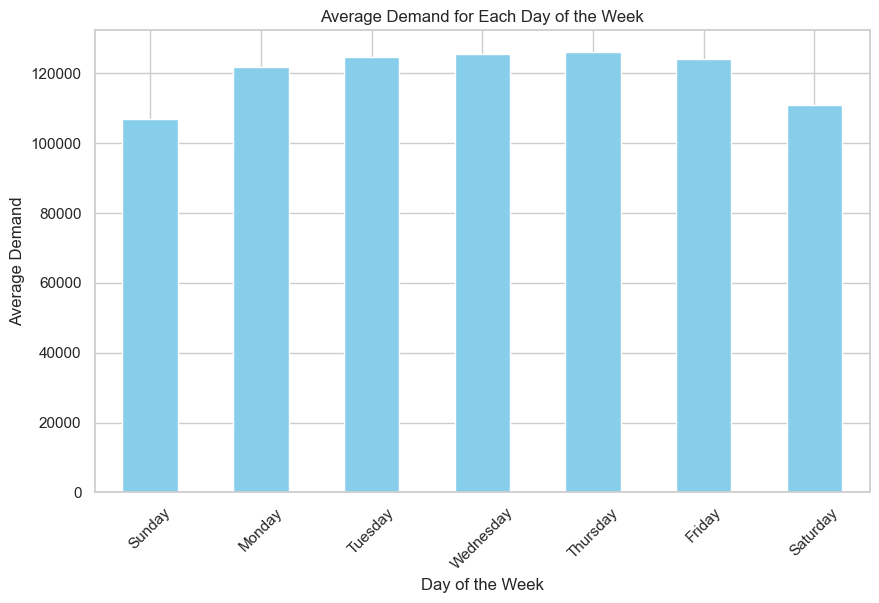

**Daily Demand Analysis:** A bar plot groups the data by the day of the week (Sunday to Saturday) and shows the average demand for each day.

In [93]:
# Demand and Price Analysis
import matplotlib.pyplot as plt
import calendar as cal

# Convert 'date' column to datetime format
import matplotlib.dates as mdates
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')


# Set 'date' as the index
df.set_index('date', inplace=True)

# Add a column for the day of the week
df['day_of_week'] = df.index.day_name()

# Group by day of the week and calculate the average demand
average_demand_by_day = df.groupby('day_of_week')['demand'].mean().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Plot the average demand for each day of the week
plt.figure(figsize=(10, 6))
average_demand_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Demand for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
display(Markdown("**Daily Demand Analysis:** A bar plot groups the data by the day of the week (Sunday to Saturday) and shows the average demand for each day."))


## Weekly Demand Variations

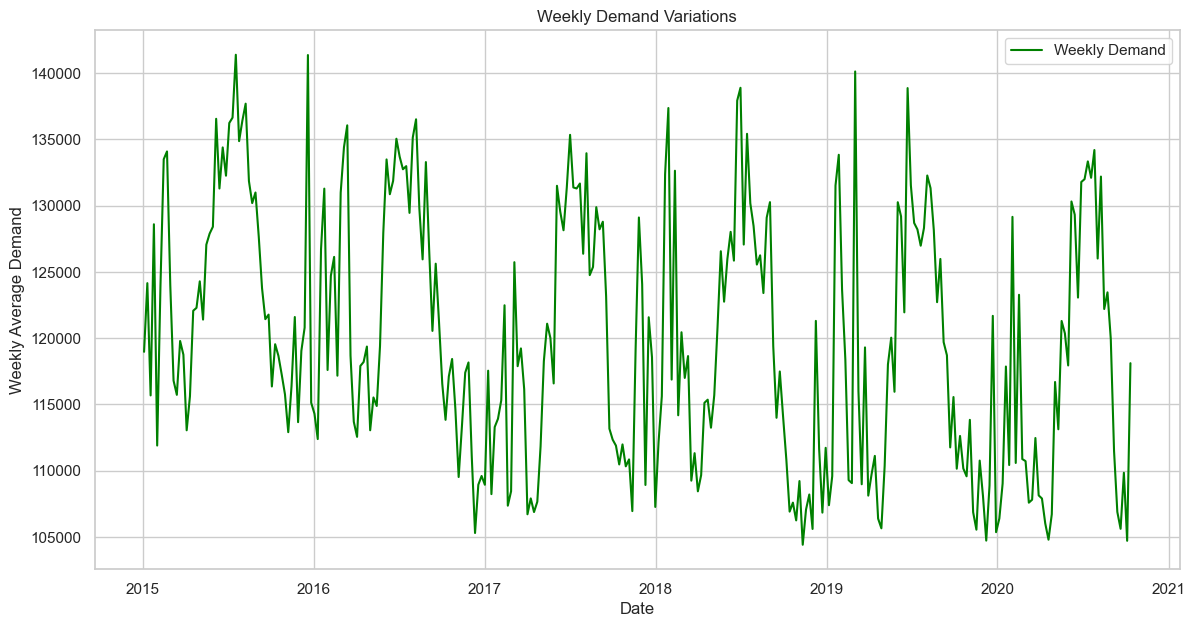

**Weekly Demand Variations:** A line plot that resamples demand data weekly to reveal trends and fluctuations.

In [94]:
# Plot weekly demand variations
weekly_demand = df['demand'].resample('W').mean()
plt.figure(figsize=(14, 7))
plt.plot(weekly_demand, label='Weekly Demand', color='green')
plt.title('Weekly Demand Variations')
plt.xlabel('Date')
plt.ylabel('Weekly Average Demand')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Weekly Demand Variations:** A line plot that resamples demand data weekly to reveal trends and fluctuations."))

## Yearly Demand Variations

C:\Users\saina\AppData\Local\Temp\ipykernel_10420\1418829592.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_demand = df['demand'].resample('Y').mean()


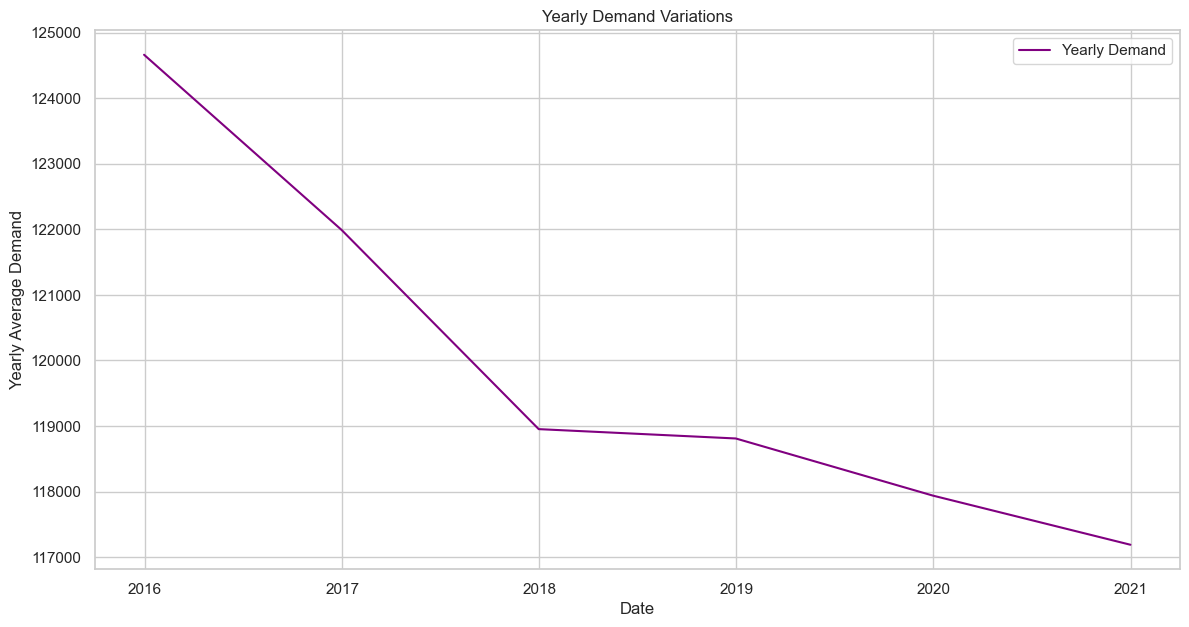

**Yearly Demand Variations:** A line plot aggregating demand by year to highlight long-term trends.

In [95]:
# Plot yearly demand variations
yearly_demand = df['demand'].resample('Y').mean()
plt.figure(figsize=(14, 7))
plt.plot(yearly_demand, label='Yearly Demand', color='purple')
plt.title('Yearly Demand Variations')
plt.xlabel('Date')
plt.ylabel('Yearly Average Demand')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Yearly Demand Variations:** A line plot aggregating demand by year to highlight long-term trends."))


## Demand vs. RRP Relationship

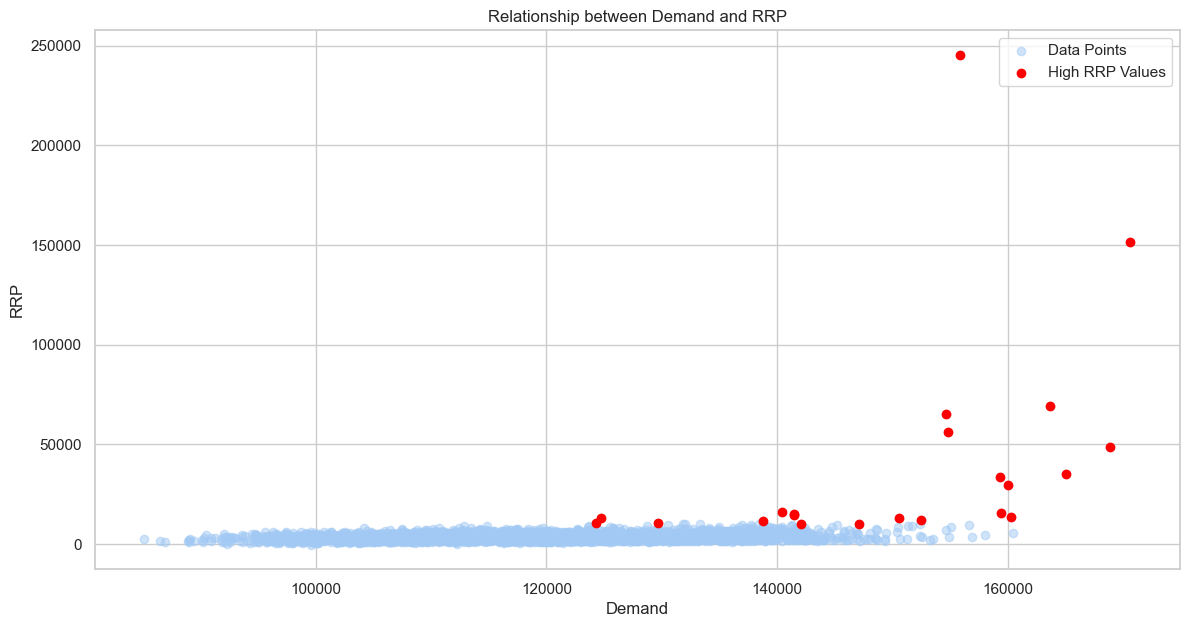

**Demand vs. RRP Relationship:** A scatter plot showing the relationship between demand and RRP with high RRP values (above the 99th percentile) highlighted in red.

In [96]:
# Analyze the relationship between demand and RRP
plt.figure(figsize=(14, 7))

# Identify high RRP values
high_rrp_threshold = df['RRP'].quantile(0.99)
high_rrp = df[df['RRP'] > high_rrp_threshold]

# Plot all data points
plt.scatter(df['demand'], df['RRP'], alpha=0.5, label='Data Points')

# Highlight high RRP values
plt.scatter(high_rrp['demand'], high_rrp['RRP'], color='red', label='High RRP Values')

plt.title('Relationship between Demand and RRP')
plt.xlabel('Demand')
plt.ylabel('RRP')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Demand vs. RRP Relationship:** A scatter plot showing the relationship between demand and RRP with high RRP values (above the 99th percentile) highlighted in red."))


## Monthly Average Demand Analysis

C:\Users\saina\AppData\Local\Temp\ipykernel_10420\674040574.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand = df['demand'].resample('M').mean()


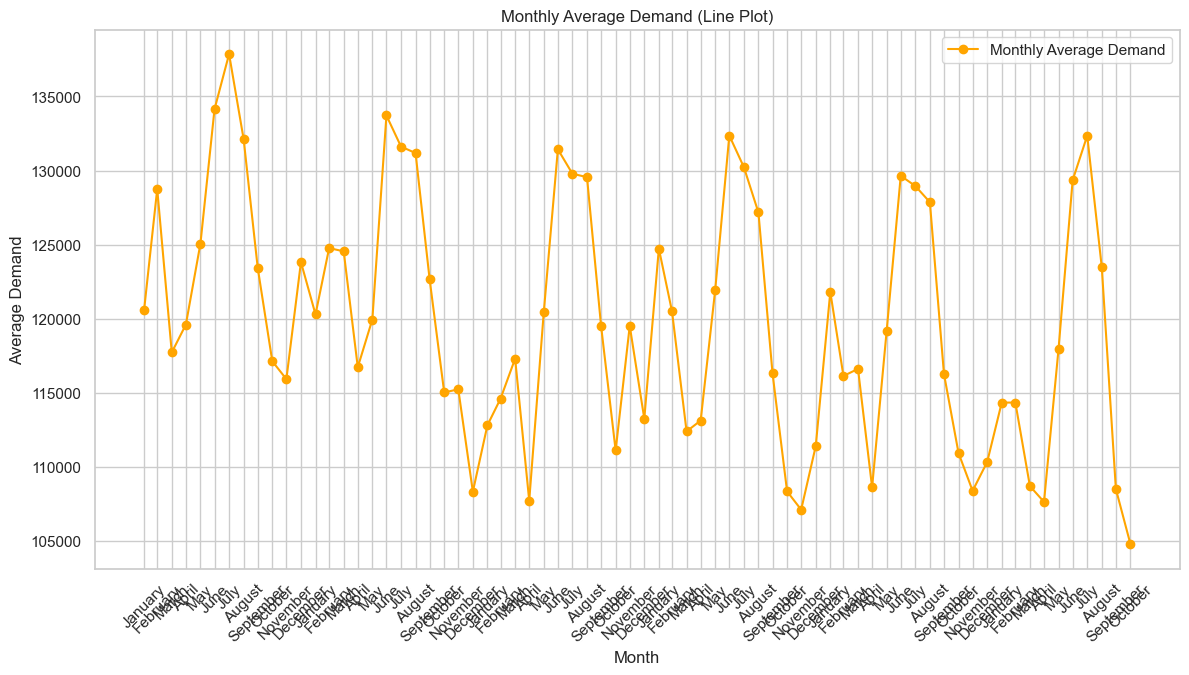

**Monthly Average Demand Analysis:** A line plot representing monthly average demand, displaying seasonal variations throughout the year.

In [97]:
# Plot monthly average demand as a line plot
monthly_demand = df['demand'].resample('M').mean()
plt.figure(figsize=(14, 7))
plt.plot(monthly_demand, marker='o', linestyle='-', color='orange', label='Monthly Average Demand')
plt.title('Monthly Average Demand (Line Plot)')
plt.xlabel('Month')
plt.ylabel('Average Demand')
import calendar
month_names = [calendar.month_name[dt.month] for dt in monthly_demand.index]
plt.xticks(monthly_demand.index, month_names, rotation=45)
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Monthly Average Demand Analysis:** A line plot representing monthly average demand, displaying seasonal variations throughout the year."))

## High Demand and Price Spikes

In [98]:
# Identify periods with high demand and significant price spikes
high_demand = df[df['demand'] > df['demand'].quantile(0.95)]
high_price_spikes = high_demand[high_demand['RRP'] > df['RRP'].quantile(0.95)]
print('Periods with high demand and significant price spikes:')
print(high_price_spikes)

Periods with high demand and significant price spikes:
                demand            RRP  demand_pos_RRP  RRP_positive  \
date                                                                  
2015-12-17  152366.300   10147.246460      152366.300    188.086125   
2016-01-13  160011.075   29442.555370      160011.075    545.737820   
2016-03-08  160285.015   13651.078150      160285.015    253.032032   
2016-07-05  142401.795    7940.775981      142401.795    147.187692   
2017-02-08  142213.660    7286.556018      142213.660    135.061279   
2017-02-09  155060.610    8453.941341      151642.620    163.717084   
2017-08-03  151355.430    9130.164971      151355.430    169.233827   
2017-11-29  151730.950    8985.515294      151730.950    166.552647   
2018-01-18  154648.065   65286.940800      154648.065   1210.137920   
2018-01-19  165070.595   34936.626120      165070.595    647.574163   
2018-01-28  159436.690   15668.139790      159436.690    290.419644   
2018-02-07  159307.315

# Weather Impact Analysis
### 1. Importing Required Libraries

In [99]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

### 2. Setting Visualization Style

In [100]:
sns.set(style="whitegrid", palette="pastel")

### 3. Removing Extreme Outliers (Excluding Rainfall)

In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"
df = pd.read_csv(file_path)

# Handle Missing Values
df_cleaned = df.ffill().bfill()  # Forward fill followed by backward fill

# Function to remove outliers using IQR, excluding "rainfall"
def remove_outliers_iqr(data, exclude_column):
    num_data = data.select_dtypes(include=['number'])  # Select only numerical columns
    if exclude_column in num_data.columns:
        num_data = num_data.drop(columns=[exclude_column])  # Drop "rainfall" from outlier detection

    Q1 = num_data.quantile(0.25)
    Q3 = num_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mask to keep only rows where all numerical values (except "rainfall") are within bounds
    mask = ~((num_data < lower_bound) | (num_data > upper_bound)).any(axis=1)
    
    return data[mask]  # Return the filtered dataset

# Remove outliers except for "rainfall"
df_no_outliers = remove_outliers_iqr(df_cleaned, "rainfall")

# Fill missing values after outlier removal
df_no_outliers = df_no_outliers.bfill()

# Encode Categorical Variables
categorical_columns = df_no_outliers.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_no_outliers[column] = label_encoder.fit_transform(df_no_outliers[column])

# Display results
print("Missing values after handling:\n", df_no_outliers.isnull().sum())
print("Dataset after removing outliers (except for rainfall):\n", df_no_outliers.head())


Missing values after handling:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64
Dataset after removing outliers (except for rainfall):
    date      demand          RRP  demand_pos_RRP  RRP_positive  \
3   175  104330.715  1349.049975      104330.715     25.005560   
4   239  118132.200  1441.769310      118132.200     26.724176   
5   297  130672.485  1687.680664      130672.485     31.282311   
7   418  142015.655  2649.877272      142015.655     49.117280   
8   479  121801.155  1860.771941      121801.155     34.490675   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
3             0.0           0.0              0.0             16.3   
4             0.0           0.0              0.0             15.0   
5

### 4. Outlier Removal for Numerical Variables

In [102]:
import pandas as pd

# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"
df = pd.read_csv(file_path)

# Define numerical variables
numerical_vars = ['demand', 'RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']

# Function to remove extreme outliers using the IQR method
def remove_extreme_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove extreme outliers except for "rainfall"
filtered_vars = [var for var in numerical_vars if var != 'rainfall' and df[var].nunique() > 10]
df_cleaned = remove_extreme_outliers(df, filtered_vars)

# Save the cleaned dataset
cleaned_file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: ../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv


### 5. Visualizing Data Distributions

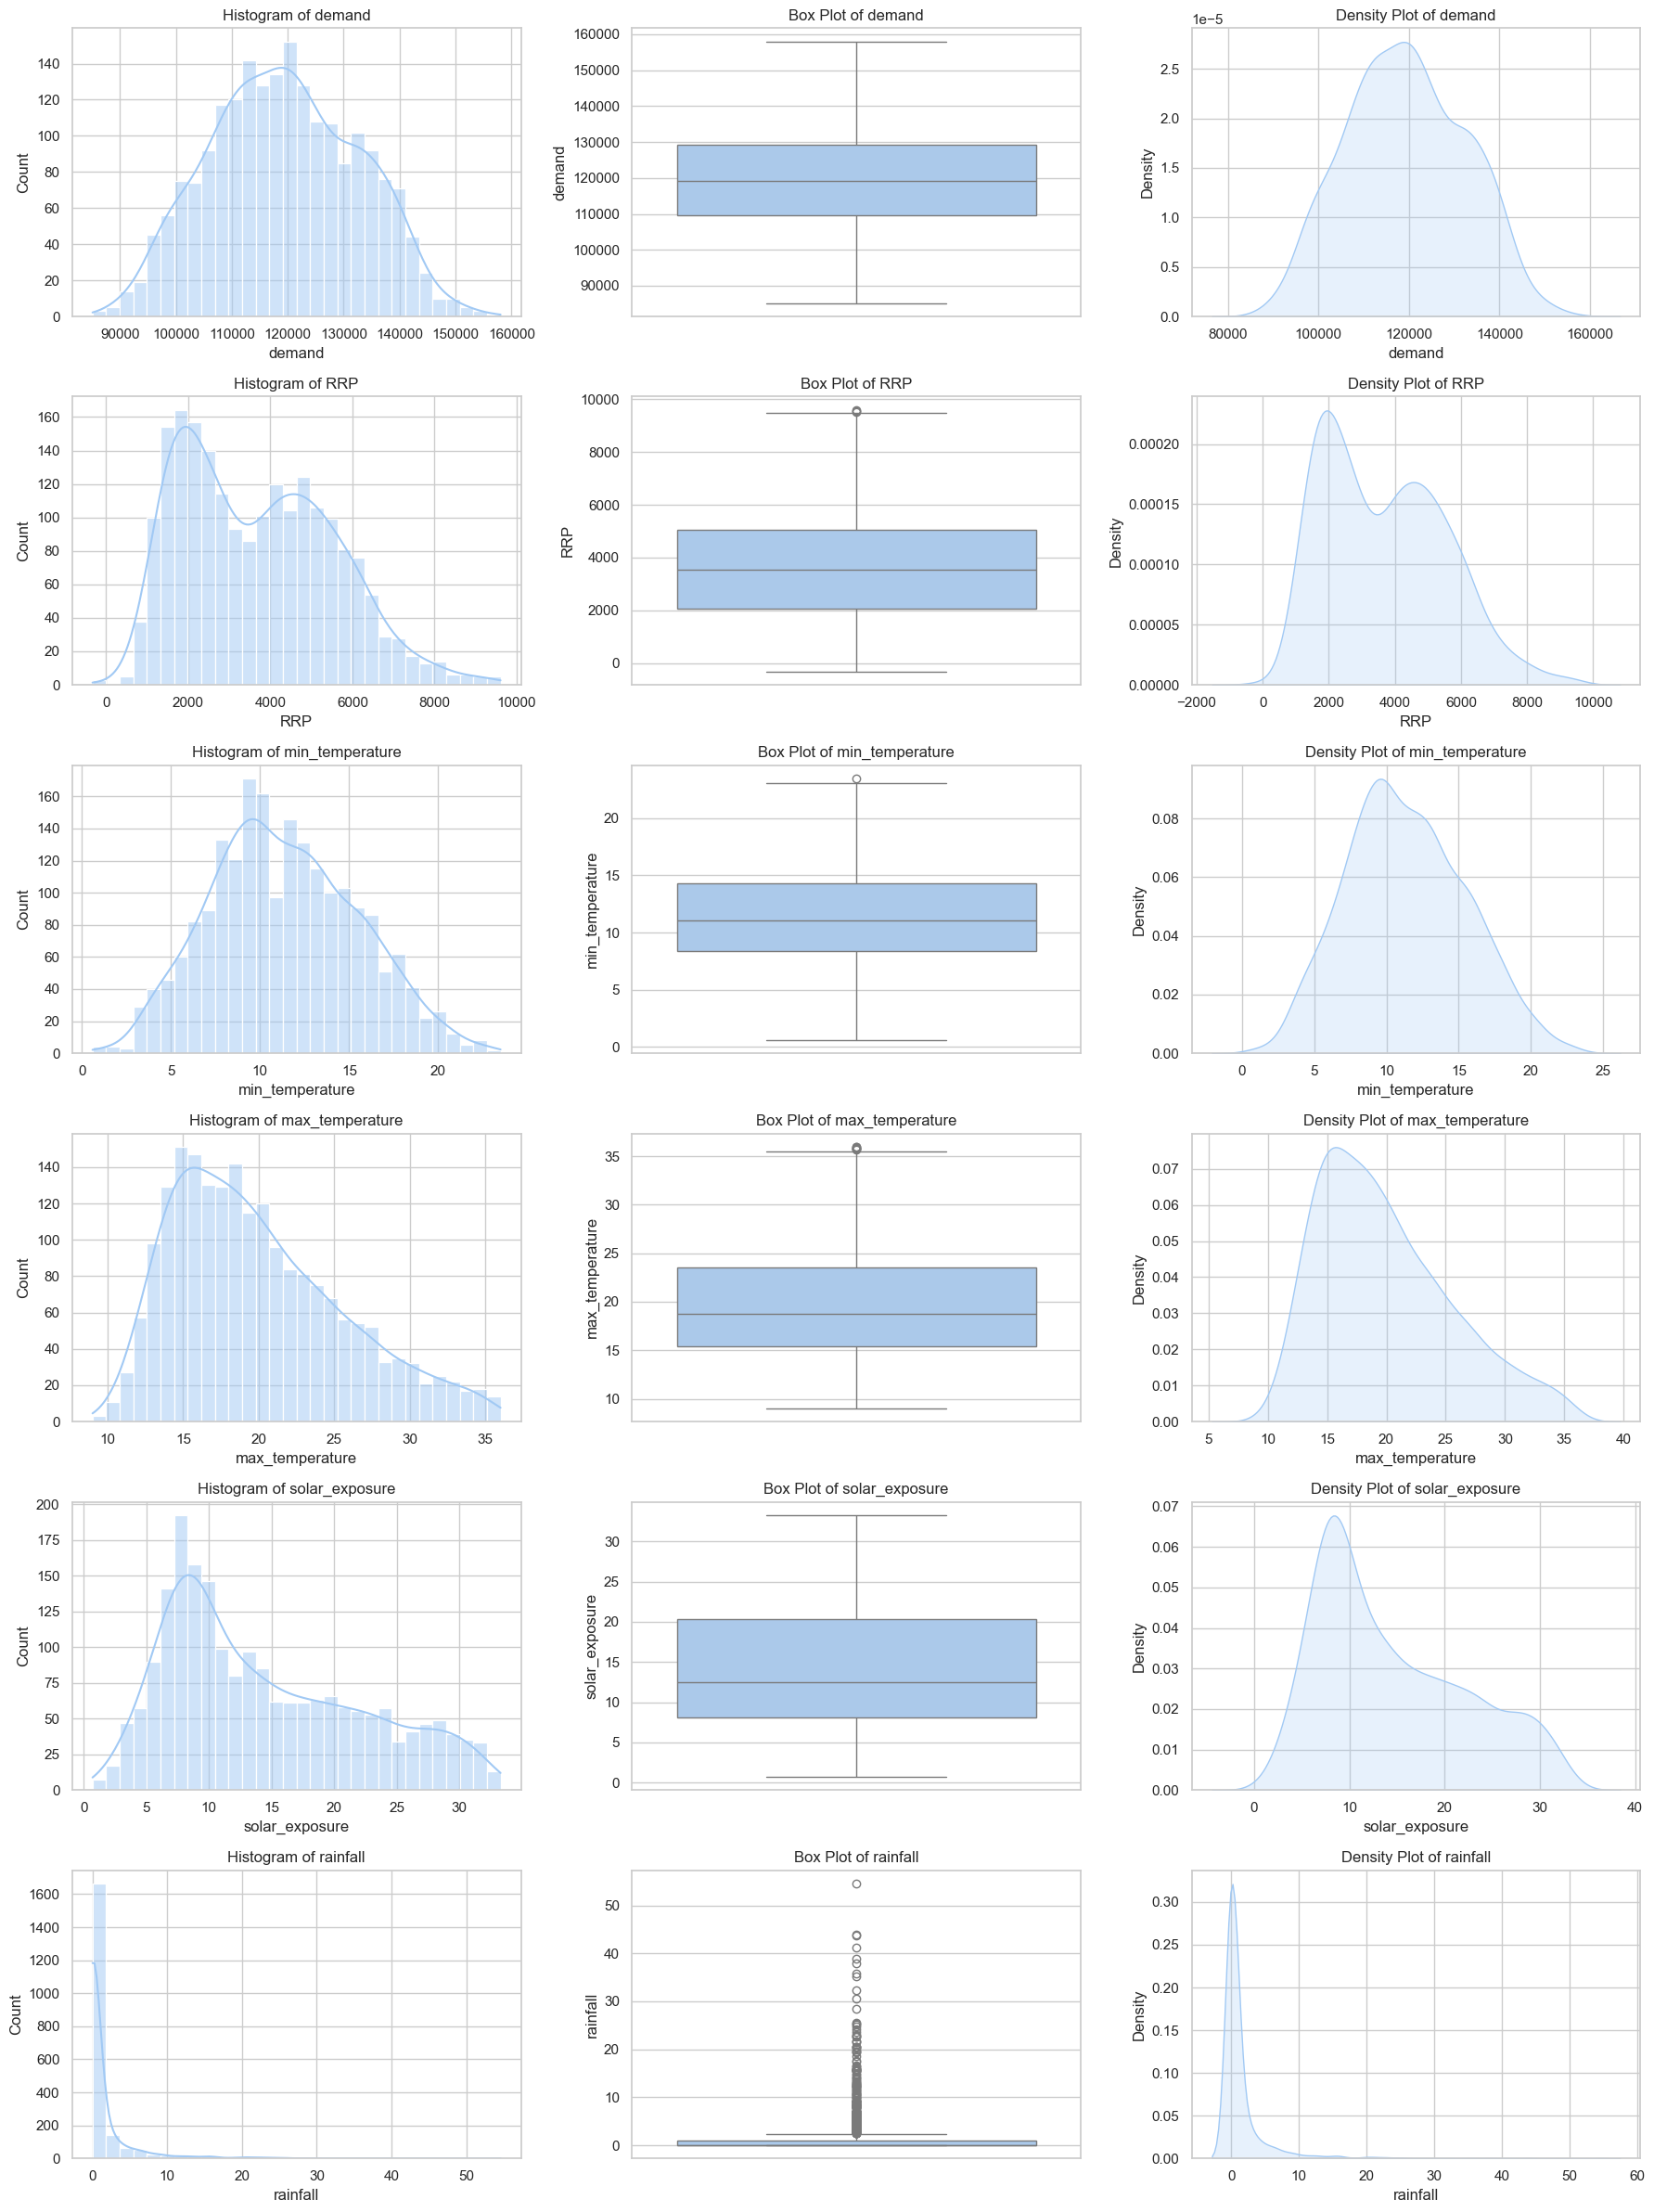

In [103]:
fig, axes = plt.subplots(len(numerical_vars), 3, figsize=(18, 4 * len(numerical_vars)))

for i, var in enumerate(numerical_vars):
    # Histogram
    sns.histplot(df_cleaned[var].dropna(), bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {var}')
    
    # Box Plot
    sns.boxplot(y=df_cleaned[var].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {var}')
    
    # KDE Density Plot (only if sufficient unique values exist)
    if df_cleaned[var].nunique() > 1:
        sns.kdeplot(df_cleaned[var].dropna(), fill=True, ax=axes[i, 2])
        axes[i, 2].set_title(f'Density Plot of {var}')
    else:
        axes[i, 2].set_title(f'Insufficient Data for KDE: {var}')

plt.tight_layout()
plt.show()

### 6. Categorical Variable Analysis

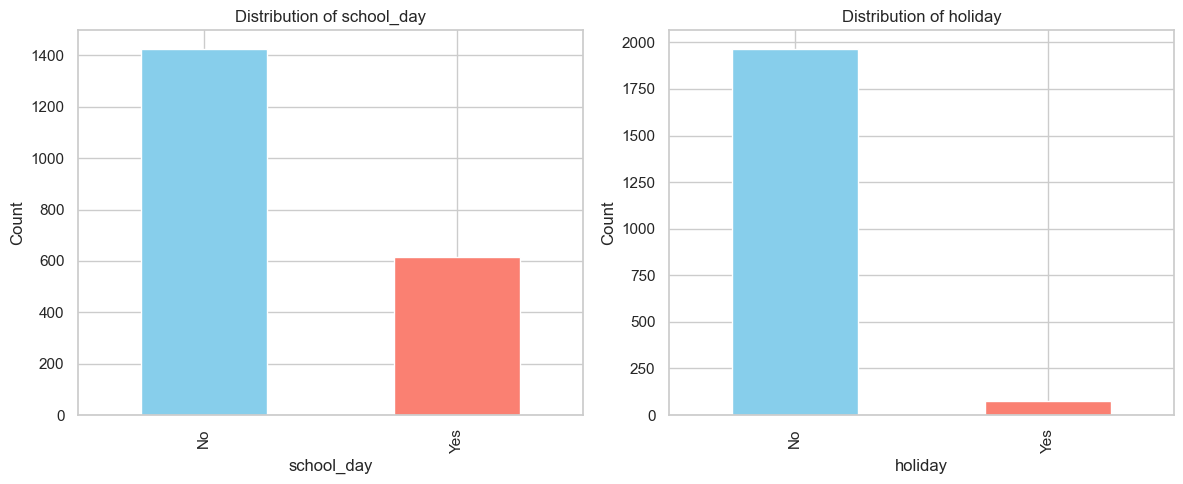

In [104]:
# Categorical Variables
categorical_vars = ['school_day', 'holiday']
fig, ax = plt.subplots(1, len(categorical_vars), figsize=(12, 5))

for i, var in enumerate(categorical_vars):
    df_cleaned[var].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], ax=ax[i])
    ax[i].set_title(f'Distribution of {var}')
    ax[i].set_xlabel(var)
    ax[i].set_ylabel('Count')
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

### 7. Correlation Heatmap (Demand vs. Weather Factors)

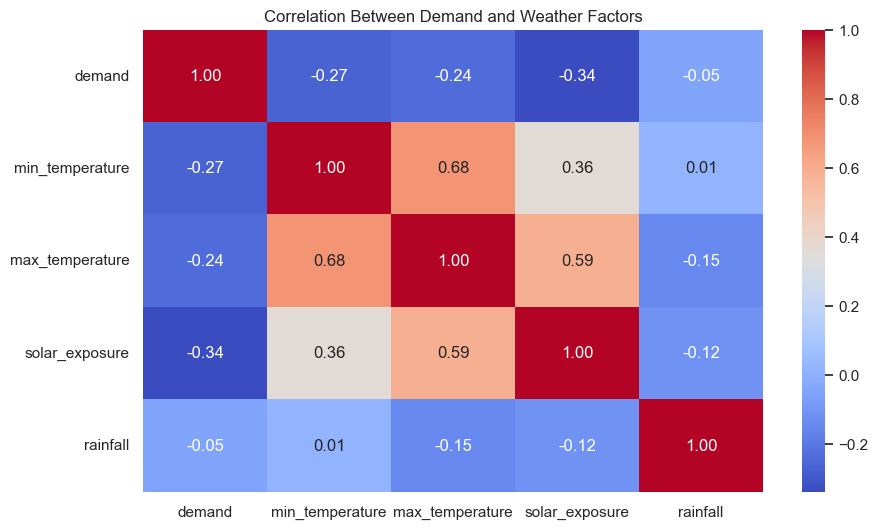

In [105]:
# Weather Impact Analysis
# Correlation Heatmap
df_weather = df_cleaned[['demand', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']]
plt.figure(figsize=(10, 6))
sns.heatmap(df_weather.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Demand and Weather Factors')
plt.show()


### 8. Scatter Plots (Demand vs. Weather Factors)

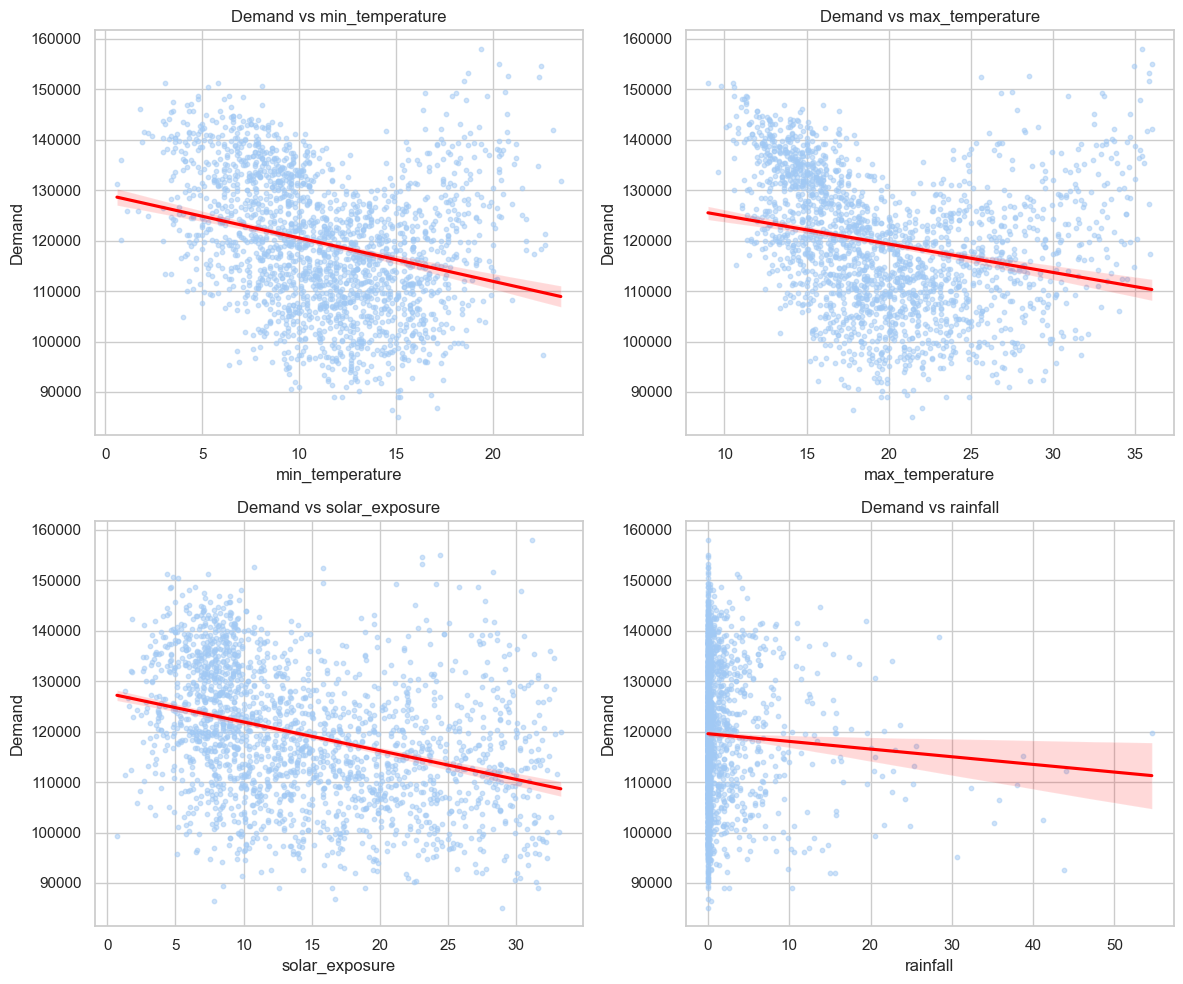

In [106]:
# Scatter Plots with Regression Lines
weather_vars = ['min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(weather_vars):
    valid_data = df_cleaned[[var, 'demand']].dropna()
    if not valid_data.empty:
        sns.regplot(x=valid_data[var], y=valid_data['demand'], ax=axes[i], scatter_kws={'alpha':0.5, 's':10}, line_kws={'color':'red'})
    axes[i].set_title(f'Demand vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Demand')

plt.tight_layout()
plt.show()

### 9. Season Classification

In [107]:
# Ensure date is in the correct format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# Create a copy to avoid modifying the original dataframe
df_cleaned = df.copy()

# Set 'date' as the index
df_cleaned.set_index('date', inplace=True)

# Extract month from the index
df_cleaned['month'] = df_cleaned.index.month

# Assign seasons based on month
df_cleaned['season'] = df_cleaned['month'].map({
    12: 'Summer', 1: 'Summer', 2: 'Summer',
    3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
    6: 'Winter', 7: 'Winter', 8: 'Winter',
    9: 'Spring', 10: 'Spring', 11: 'Spring'
})

# Check if all seasons exist
print("Unique Seasons:", df_cleaned['season'].unique())
print("Season Counts:\n", df_cleaned['season'].value_counts())

# Check month distribution
print("Month Counts:\n", df_cleaned['month'].value_counts())


Unique Seasons: ['Summer' 'Autumn' 'Winter' 'Spring']
Season Counts:
 season
Autumn    552
Winter    552
Summer    511
Spring    491
Name: count, dtype: int64
Month Counts:
 month
1     186
3     186
5     186
7     186
8     186
4     180
6     180
9     180
2     170
10    161
12    155
11    150
Name: count, dtype: int64


### 10. Electricity Demand by Season

C:\Users\saina\AppData\Local\Temp\ipykernel_10420\1907489123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='demand', data=df_cleaned,


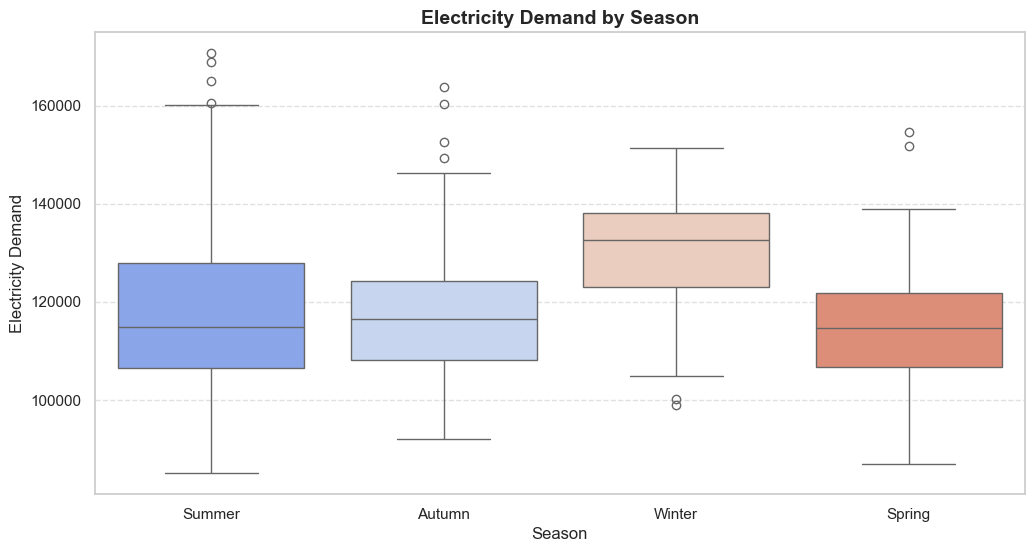

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='demand', data=df_cleaned, 
            order=['Summer', 'Autumn', 'Winter', 'Spring'], 
            palette='coolwarm')

plt.title('Electricity Demand by Season', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Electricity Demand', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##  To analyze Operational Efficiency & Special Event Impact, we need to:

### 1️⃣ Study How Holidays & School Days 


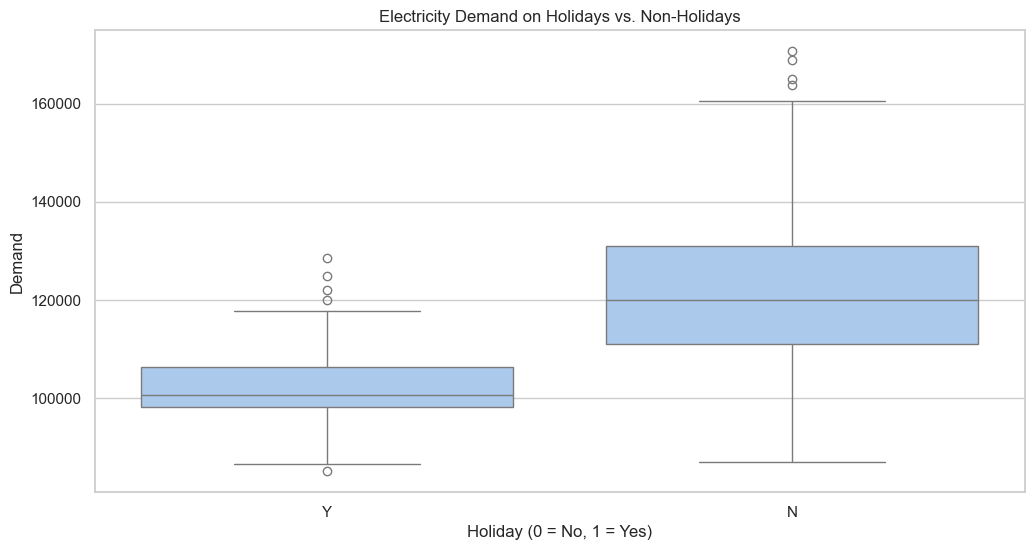

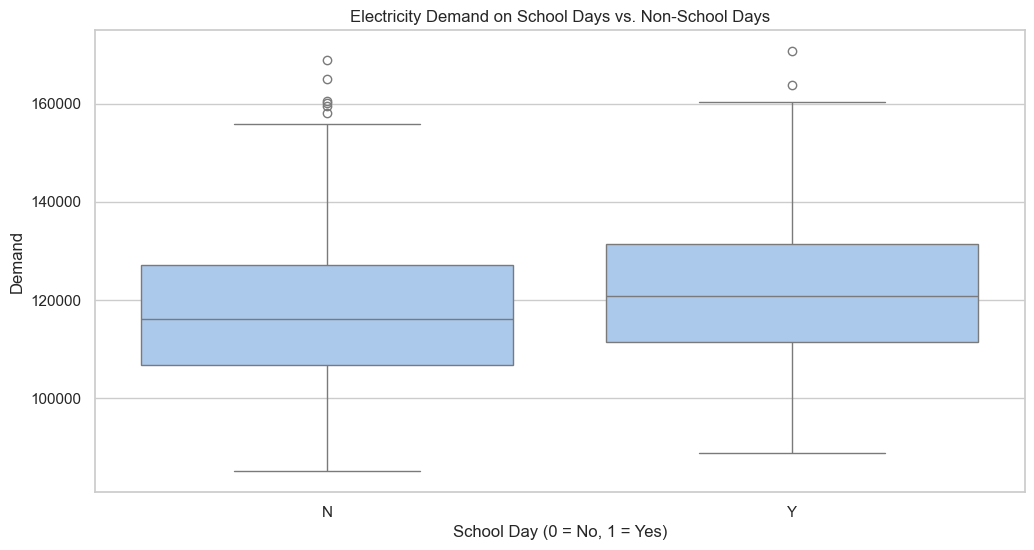

In [109]:
# Impact of Holidays and School Days on Demand
plt.figure(figsize=(12, 6))
sns.boxplot(x='holiday', y='demand', data=df_cleaned)
plt.title('Electricity Demand on Holidays vs. Non-Holidays')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Demand')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='school_day', y='demand', data=df_cleaned)
plt.title('Electricity Demand on School Days vs. Non-School Days')
plt.xlabel('School Day (0 = No, 1 = Yes)')
plt.ylabel('Demand')
plt.show()

# Anomaly Detection in Electricity Demand
### 1. Ensuring Date Index Format

In [110]:
df_cleaned.index = pd.to_datetime(df_cleaned.index)

### 2. Detecting Anomalies Using Z-Score

In [111]:
# Compute Z-score for anomaly detection
df_cleaned['demand_zscore'] = np.abs((df_cleaned['demand'] - df_cleaned['demand'].mean()) / df_cleaned['demand'].std())

# Lower the threshold to detect more anomalies
df_cleaned['is_anomaly'] = df_cleaned['demand_zscore'] > 2.0  # Lowered from 2.5


### 3. Debugging Anomaly Detection

In [112]:
# DEBUG: Print detected anomalies
print(df_cleaned[df_cleaned['is_anomaly']])
print(f"Total anomalies detected: {df_cleaned['is_anomaly'].sum()}")


                demand            RRP  demand_pos_RRP  RRP_positive  \
date                                                                  
2015-01-07  153514.820    2606.449091      149498.715     49.639712   
2015-01-21  148702.505    1858.222264      148702.505     34.443415   
2015-01-22  153232.100    1900.699578      153232.100     35.230761   
2015-02-11  149322.850    1761.761759      149322.850     32.655454   
2015-06-02  148534.505    3229.233001      148534.505     59.856033   
...                ...            ...             ...           ...   
2020-01-30  154816.490   56347.931980      154816.490   1044.447303   
2020-01-31  170653.840  151569.154000      170653.840   2809.437516   
2020-04-11   92097.070    1075.444996       63861.950     31.168805   
2020-09-20   86891.230    1243.619512       66569.795     32.443896   
2020-10-03   92277.025    -107.008241       44133.510     32.438156   

            demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  

### 4. Visualizing Electricity Demand with Anomalies Highlighted

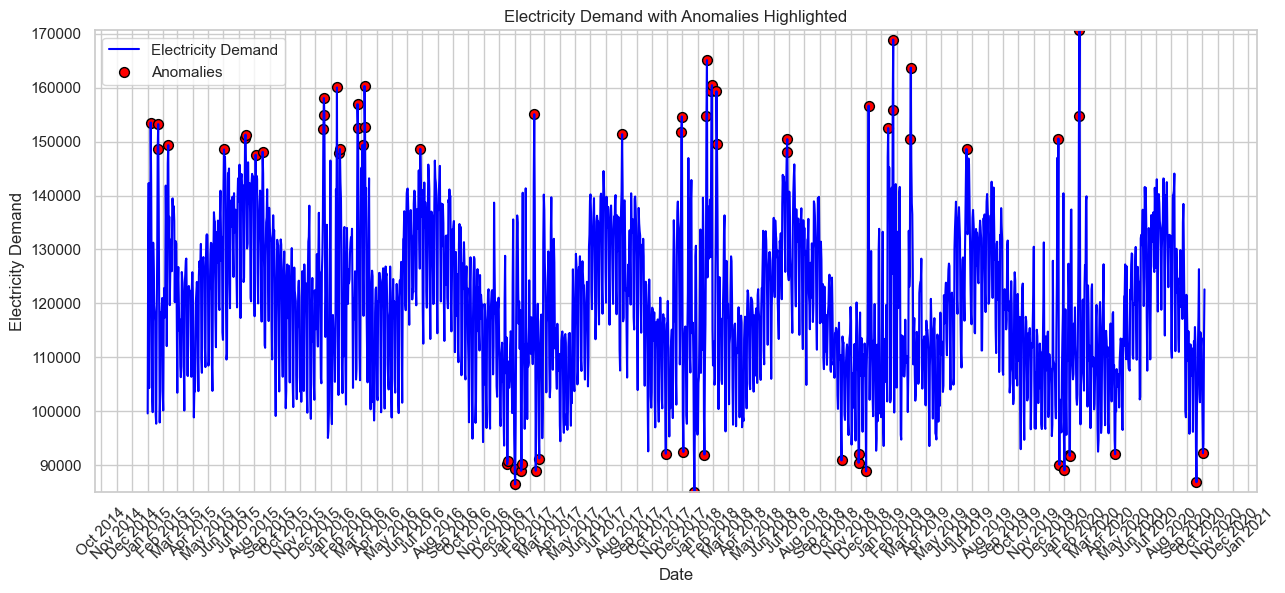

In [113]:
# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(df_cleaned.index, df_cleaned['demand'], label='Electricity Demand', color='blue')

# Highlight anomalies if any exist
anomalies = df_cleaned[df_cleaned['is_anomaly']]
if not anomalies.empty:
    plt.scatter(anomalies.index, anomalies['demand'], color='red', label='Anomalies', s=50, edgecolors='black')

# Formatting the x-axis for seasonality
plt.xlabel('Date')
plt.ylabel('Electricity Demand')
plt.title('Electricity Demand with Anomalies Highlighted')
plt.legend()

# Ensure all months are displayed on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)

# Adjust Y-limits dynamically
plt.ylim(df_cleaned['demand'].min() - 10, df_cleaned['demand'].max() + 10)

plt.grid(True)
plt.show()

### 5. Revenue and Cost Optimization

# Electricity RRP Analysis with Negative RRP Periods Highlighted

### 1. Convert Index to DateTime

In [122]:
df_cleaned.index = pd.to_datetime(df_cleaned.index)

### 2. Extract Unique Years from Dataset

In [ ]:

unique_years = sorted(df_cleaned.index.year.unique())

### 3. Plotting RRP Over Time & Highlighting Negative RRP Periods

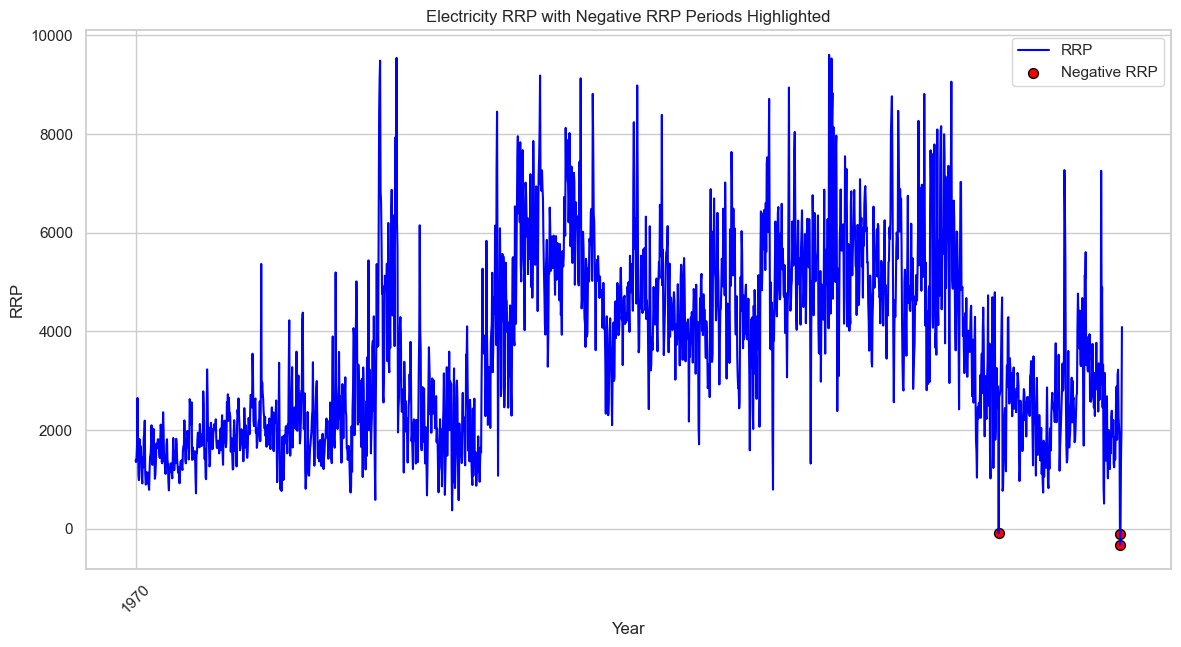

In [123]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Extract unique years from the dataset
unique_years = sorted(df_cleaned.index.year.unique())

# Create the figure
plt.figure(figsize=(14, 7))

# Plot RRP over time
plt.plot(df_cleaned.index, df_cleaned['RRP'], label='RRP', color='blue')

# Highlight negative RRP periods
negative_rrp = df_cleaned[df_cleaned['RRP'] < 0]
plt.scatter(negative_rrp.index, negative_rrp['RRP'], color='red', label='Negative RRP', s=50, edgecolors='black')

# Title and labels
plt.title('Electricity RRP with Negative RRP Periods Highlighted')
plt.xlabel('Year')
plt.ylabel('RRP')

# Ensure all years are shown on the x-axis
plt.xticks(
    ticks=[pd.Timestamp(f"{year}-01-01") for year in unique_years],  # Explicitly set all years
    labels=unique_years,
    rotation=45
)

# Use major tick formatting for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.grid(True)
plt.show()

# Summary of Insights and Recommendations
## Strategies for Revenue and Cost Efficiency:
### Adaptive Pricing & Flexible Demand:

#### 1.Implement adaptive pricing to balance supply and demand.

**Encourage usage during low-cost periods with flexible demand programs.**

**Offer incentives for reducing consumption during peak times.**

**Impact: Balances grid load, reduces costs, and stabilizes the system.**

#### 2.Energy Storage Solutions:

**Invest in technologies to store excess energy during off-peak times.**

**Store renewable energy when generation is high and demand is low.**

**Discharge stored energy during high-demand periods to stabilize prices.**

### Impact: Reduces reliance on non-renewable sources, lowers costs, and increases energy security.

#### 3.Smart Infrastructure & Predictive Maintenance:

**Develop and deploy smart grid technologies for real-time monitoring and control.**

**Use AI and machine learning for accurate demand forecasting.**

**Implement predictive maintenance to prevent critical failures.**

### Impact: Enhances efficiency, reduces operational costs, and ensures grid reliability.

#### 4.Balanced Energy Portfolio:

**Promote a diverse energy mix including renewables, hydro, and flexible sources like natural gas.**

**Support policies to encourage investment in various energy sources.**

### Impact: Enhances energy security, reduces emissions, and stabilizes the energy system.

### Readiness for Forecasting & Data Preparation:
#### 5.Essential Features:

**Time-based variables: Include day, week, hour to capture demand patterns.**

**Historical demand: Use past demand data for future predictions.**

**Weather conditions: Factor in temperature, humidity, etc.**

**Special events: Include holidays and events that impact demand.**

### Impact: Improves forecasting accuracy and relevance.

#### 6.Data Integrity:

**Ensure datasets are complete with no missing values.**

**Clean anomalies and outliers for accurate forecasts.**

### Impact: Increases data reliability, enhancing forecast accuracy.

#### 7.Data Transformation Techniques:

**Normalization & Scaling: Ensure features contribute equally to the model.**

#### 8.Encoding: Convert categorical variables into numerical form.

#### 9.Feature Engineering: Create new features for better insights.

### Impact: Enhances model performance and accuracy.

### These updated insights and recommendations should provide a clear path to optimizing revenue and costs, as well as enhancing forecasting readiness

## LABEL ENCODING FOR SCHOOL DAYS AND HOLIDAY

In [115]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your cleaned dataset
df_cleaned = pd.read_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv")

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'school_day' and 'holiday' columns
df_cleaned['school_day'] = label_encoder.fit_transform(df_cleaned['school_day'])
df_cleaned['holiday'] = label_encoder.fit_transform(df_cleaned['holiday'])

# Save the updated dataset back to the CSV file
df_cleaned.to_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv", index=False)

print(df_cleaned.head())

         date      demand          RRP  demand_pos_RRP  RRP_positive  \
0  01-01-2015   99635.030  1382.937923       97319.240     26.415953   
1  04-01-2015  104330.715  1349.049975      104330.715     25.005560   
2  05-01-2015  118132.200  1441.769310      118132.200     26.724176   
3  06-01-2015  130672.485  1687.680664      130672.485     31.282311   
4  08-01-2015  142015.655  2649.877272      142015.655     49.117280   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0         2315.79         -7.24         0.020833             13.3   
1            0.00          0.00         0.000000             16.3   
2            0.00          0.00         0.000000             15.0   
3            0.00          0.00         0.000000             17.7   
4            0.00          0.00         0.000000             23.1   

   max_temperature  solar_exposure  rainfall  school_day  holiday  
0             26.9            23.6       0.0           0        1  
1             21

## APPLYING ONE_HOT ENCODING FOR THE REQUIRED CATEGORICAL COLUMNS

In [116]:
import pandas as pd

# Load the cleaned dataset
df_cleaned = pd.read_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv")

# Inspect categorical variables (columns with dtype 'object')
categorical_vars = df_cleaned.select_dtypes(include=['object']).columns
print("All categorical variables:", categorical_vars)

# Identify low cardinality categorical columns (e.g., fewer than 10 unique values)
low_cardinality_vars = [col for col in categorical_vars if df_cleaned[col].nunique() < 10]
print("Low cardinality categorical variables:", low_cardinality_vars)

# One-hot encode these low cardinality variables
df_encoded = pd.get_dummies(df_cleaned, columns=low_cardinality_vars, drop_first=True)

print("Columns after one-hot encoding:")
print(df_encoded.columns)

All categorical variables: Index(['date'], dtype='object')
Low cardinality categorical variables: []
Columns after one-hot encoding:
Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')


## Datetime Encoding

In [117]:
import pandas as pd
import numpy as np

# Load the cleaned dataset (Use the correct file path)
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv"  
df_cleaned = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert 'date' column to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%d-%m-%Y', errors='coerce')

# Extract date components
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['day'] = df_cleaned['date'].dt.day
df_cleaned['weekday'] = df_cleaned['date'].dt.weekday

# Cyclical encoding for the month
df_cleaned['month_sin'] = np.sin(2 * np.pi * df_cleaned['month'] / 12)
df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['month'] / 12)

# Save the updated dataset back
df_cleaned.to_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv", index=False)
print("✅ Updated cleaned dataset saved successfully!")


✅ Updated cleaned dataset saved successfully!


In [118]:
import pandas as pd
import numpy as np

# Load the cleaned dataset (Use the correct file path)
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv"  
df_cleaned = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert 'date' column to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%d-%m-%Y', errors='coerce')

# Extract date components
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['day'] = df_cleaned['date'].dt.day
df_cleaned['weekday'] = df_cleaned['date'].dt.weekday

# Cyclical encoding for the month
df_cleaned['month_sin'] = np.sin(2 * np.pi * df_cleaned['month'] / 12)
df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['month'] / 12)



##FEATURE ENGINEERING


##model training


C:\Users\saina\AppData\Local\Temp\ipykernel_10420\2354909339.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\saina\AppData\Local\Temp\ipykernel_10420\2354909339.py:48: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['demand_lag_1', 'demand_lag_7', 'rrp_lag_1', 'rrp_lag_7']].fillna(method='bfill', inplace=True)
C:\Users\saina\AppData\Local\Temp\ipykernel_10420\2354909339.py:48:

NaN count before dropping:
demand                   0
demand_lag_1             0
demand_lag_7             0
rrp                      0
rrp_lag_1                0
rrp_lag_7                0
min_temperature          0
max_temperature          0
solar_exposure           0
rainfall                 0
temp_rain_interaction    0
dtype: int64
Train size: (1633, 16), Test size: (409, 16)
     demand  demand_lag_1  demand_lag_7       rrp  rrp_lag_1  rrp_lag_7  \
0 -2.095402     -0.001690     -0.001231 -1.397133  -0.001303  -0.000909   
1 -1.846017     -1.051484     -0.001231 -1.407423  -0.701162  -0.000909   
2 -1.274231     -1.234831     -0.001231 -1.392084  -0.941318  -0.000909   
3 -0.655335     -0.959285     -0.001231 -1.347080  -1.047298  -0.000909   
4 -0.043026     -0.527029     -0.001231 -1.203212  -1.080970  -0.000909   

   min_temperature  max_temperature  solar_exposure  rainfall  \
0         0.561157         1.548213        1.423300 -0.808292   
1         0.997533         0.935987  

18:06:11 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\saina\AppData\Local\Temp\ipykernel_10420\2354909339.py:130: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future[col].fillna(scaled_df[col].mean(), inplace=True)


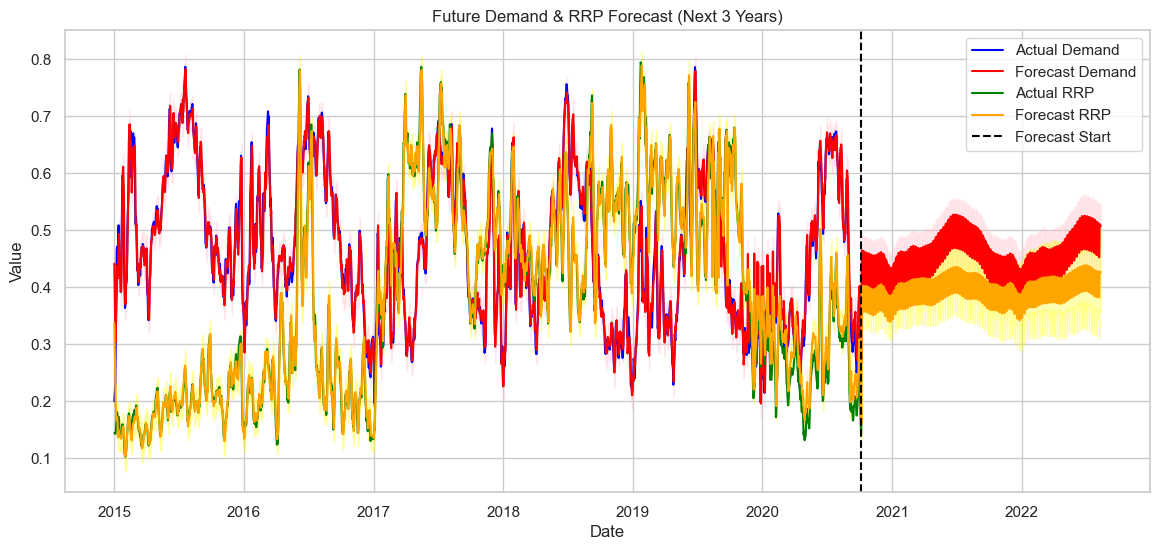

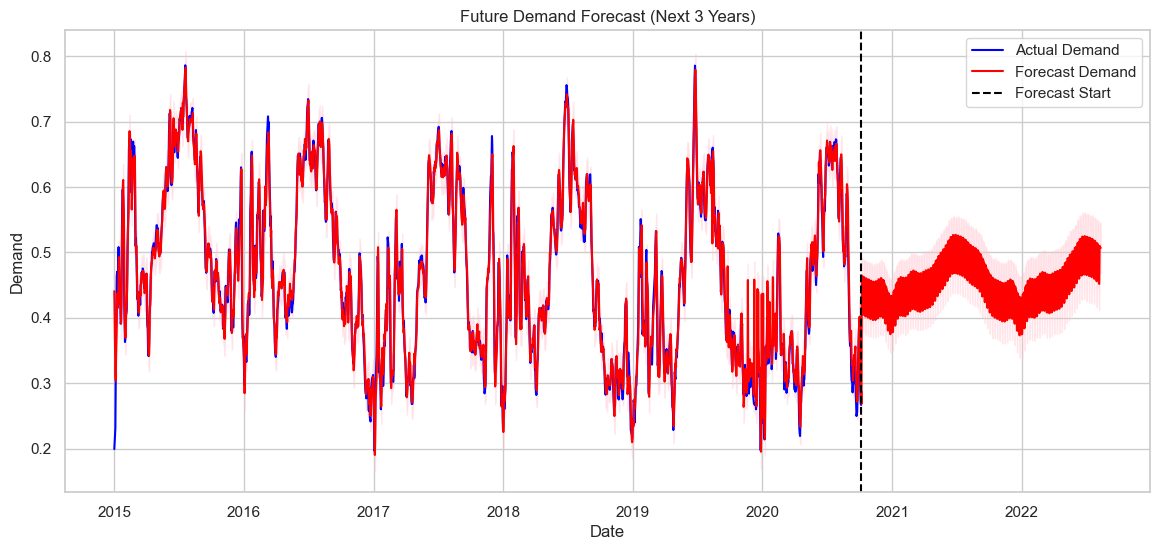

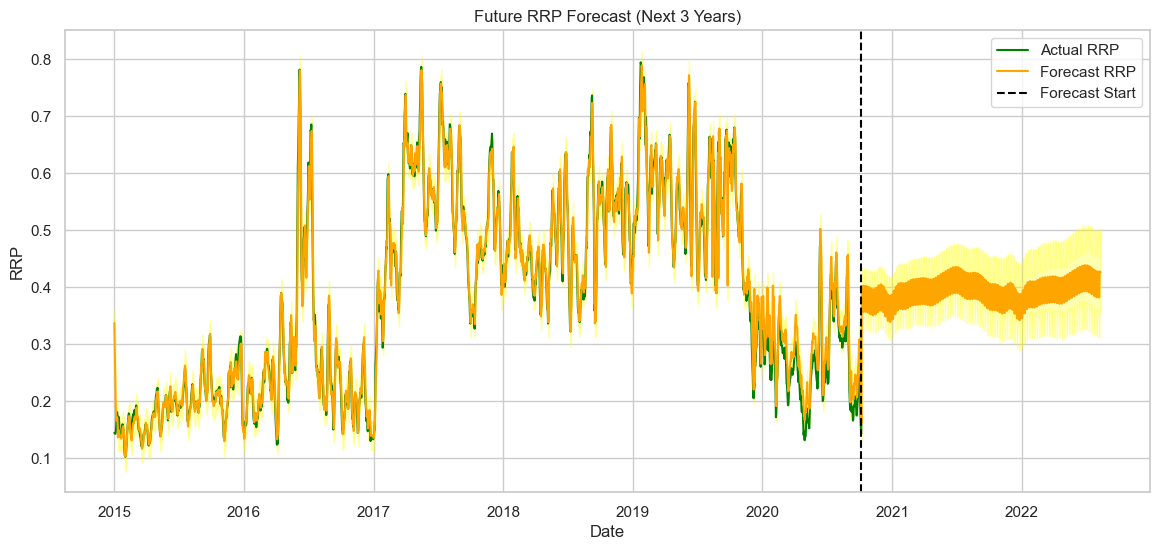

Demand Forecast Accuracy (Prophet):
MAE: 0.0162, RMSE: 0.0206

RRP Forecast Accuracy (Prophet):
MAE: 0.0269, RMSE: 0.0319

Additional Accuracy Evaluation (Percentage Range) - Prophet:
Demand Accuracy: 95.62%, RRP Accuracy: 90.08%


In [128]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle

# Load dataset
df = pd.read_csv('../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset_2.csv')

# Ensure date column is present and valid
if 'date' not in df.columns or df['date'].isna().all():
    print("🚨 Date column is missing! Reconstructing...")
    df['date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')
else:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create lag features for demand and rrp
df['demand_lag_1'] = df['demand'].shift(1)
df['demand_lag_7'] = df['demand'].shift(7)
df['rrp_lag_1'] = df['rrp'].shift(1)
df['rrp_lag_7'] = df['rrp'].shift(7)

# Create interaction term for weather effects
df['temp_rain_interaction'] = df['min_temperature'] * df['rainfall']

df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = (df['weekday'] >= 5).astype(int)
df['extreme_weather'] = ((df['max_temperature'] > df['max_temperature'].quantile(0.95)) | 
                         (df['rainfall'] > df['rainfall'].quantile(0.95))).astype(int)

df['ds'] = df['date'].copy()
df = df.dropna(subset=['ds'])

# Scaling
scaler = StandardScaler()
features_to_scale = ['demand', 'demand_lag_1', 'demand_lag_7', 'rrp', 'rrp_lag_1', 'rrp_lag_7',
                     'min_temperature', 'max_temperature', 'solar_exposure',
                     'rainfall', 'temp_rain_interaction']

# Fill missing values using column mean before rolling mean
for col in features_to_scale:
    df[col].fillna(df[col].mean(), inplace=True)
    df[col] = df[col].rolling(window=7, min_periods=1).mean()

# Handle lags properly
df[['demand_lag_1', 'demand_lag_7', 'rrp_lag_1', 'rrp_lag_7']].fillna(method='bfill', inplace=True)

# Forward and backward fill any remaining NaNs
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Debug: Check for NaNs before dropping rows
nan_report = df[features_to_scale].isna().sum()
print("NaN count before dropping:")
print(nan_report)

if nan_report.sum() > 0:
    print(f"🚨 Remaining NaNs (after all filling attempts):\n{nan_report}")

df = df.dropna(subset=features_to_scale)
if df.empty:
    raise ValueError("🚨 All rows have NaNs after preprocessing! Check data integrity.")

# Scale features
scaled_features = scaler.fit_transform(df[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)
scaled_df['is_weekend'] = df['is_weekend'].values
scaled_df['extreme_weather'] = df['extreme_weather'].values
scaled_df['ds'] = df['ds'].values
scaled_df['y_demand'] = df['demand'].values
scaled_df['y_rrp'] = df['rrp'].values
scaled_df = scaled_df.dropna(subset=['y_demand', 'y_rrp'])
scaled_df['ds'] = pd.to_datetime(scaled_df['ds'])

# Split Data
train_size = int(len(scaled_df) * 0.8)
train_df = scaled_df.iloc[:train_size]
test_df = scaled_df.iloc[train_size:]

print(f"Train size: {train_df.shape}, Test size: {test_df.shape}")
print(train_df.head())

# Train Prophet Model for Demand
model_demand = Prophet()
regressor_cols = ['demand_lag_1', 'demand_lag_7', 'rrp_lag_1', 'rrp_lag_7',
                  'min_temperature', 'max_temperature', 'solar_exposure',
                  'rainfall', 'temp_rain_interaction', 'is_weekend', 'extreme_weather']
for col in regressor_cols:
    model_demand.add_regressor(col)

# Rename 'y_demand' to 'y' as required by Prophet
train_df_demand = train_df[['ds', 'y_demand'] + regressor_cols].rename(columns={'y_demand': 'y'})
# Fit the Prophet model for Demand
model_demand.fit(train_df_demand)
# Train Prophet Model for RRP
model_rrp = Prophet()
for col in regressor_cols:
    model_rrp.add_regressor(col)

# Rename 'y_rrp' to 'y' as required by Prophet
train_df_rrp = train_df[['ds', 'y_rrp'] + regressor_cols].rename(columns={'y_rrp': 'y'})
model_rrp.fit(train_df_rrp)

# Save the models to disk
with open('model_demand.pkl', 'wb') as f:
    pickle.dump(model_demand, f)

with open('model_rrp.pkl', 'wb') as f:
    pickle.dump(model_rrp, f)

# Create a future dataframe for the next 3 years (1095 days)
future = model_demand.make_future_dataframe(periods=1095, freq='D')

# Merge the additional regressor data from scaled_df
future = future.merge(
        scaled_df[['ds'] + regressor_cols],
        on='ds', how='left', suffixes=('', '_new')
)

# Overwrite existing regressor columns if new values were merged
for col in regressor_cols:
    if col + '_new' in future.columns:
        future[col] = future[col + '_new']
        future.drop(columns=[col + '_new'], inplace=True)

# Fill any missing regressor values with the mean from scaled_df
for col in regressor_cols:
    future[col].fillna(scaled_df[col].mean(), inplace=True)

# Predict future demand and rrp
forecast_demand = model_demand.predict(future)
forecast_rrp = model_rrp.predict(future)

# Plot actual vs. future forecasts
plt.figure(figsize=(14, 6))
plt.plot(scaled_df['ds'], scaled_df['y_demand'], label='Actual Demand', color='blue')
plt.plot(forecast_demand['ds'], forecast_demand['yhat'], label='Forecast Demand', color='red')
plt.fill_between(
        forecast_demand['ds'],
        forecast_demand['yhat_lower'],
        forecast_demand['yhat_upper'],
        color='pink', alpha=0.3
)
plt.plot(scaled_df['ds'], scaled_df['y_rrp'], label='Actual RRP', color='green')
plt.plot(forecast_rrp['ds'], forecast_rrp['yhat'], label='Forecast RRP', color='orange')
plt.fill_between(
        forecast_rrp['ds'],
        forecast_rrp['yhat_lower'],
        forecast_rrp['yhat_upper'],
        color='yellow', alpha=0.3
)
plt.axvline(test_df['ds'].max(), color='black', linestyle='--', label='Forecast Start')
plt.title('Future Demand & RRP Forecast (Next 3 Years)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Filter forecasts that match test dates for both demand and rrp
test_forecast_demand = test_df[['ds', 'y_demand']].merge(
    forecast_demand[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds'
)
test_forecast_rrp = test_df[['ds', 'y_rrp']].merge(
    forecast_rrp[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds'
)

# Compute accuracy metrics for Demand
mae_demand = mean_absolute_error(test_forecast_demand['y_demand'], test_forecast_demand['yhat'])
rmse_demand = np.sqrt(mean_squared_error(test_forecast_demand['y_demand'], test_forecast_demand['yhat']))

# Compute accuracy metrics for RRP
mae_rrp = mean_absolute_error(test_forecast_rrp['y_rrp'], test_forecast_rrp['yhat'])
rmse_rrp = np.sqrt(mean_squared_error(test_forecast_rrp['y_rrp'], test_forecast_rrp['yhat']))

# Plot Demand forecasts
plt.figure(figsize=(14, 6))
plt.plot(scaled_df['ds'], scaled_df['y_demand'], label='Actual Demand', color='blue')
plt.plot(forecast_demand['ds'], forecast_demand['yhat'], label='Forecast Demand', color='red')
plt.fill_between(
    forecast_demand['ds'],
    forecast_demand['yhat_lower'],
    forecast_demand['yhat_upper'],
    color='pink', alpha=0.3
)
plt.axvline(test_df['ds'].max(), color='black', linestyle='--', label='Forecast Start')
plt.title('Future Demand Forecast (Next 3 Years)')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# Plot RRP forecasts
plt.figure(figsize=(14, 6))
plt.plot(scaled_df['ds'], scaled_df['y_rrp'], label='Actual RRP', color='green')
plt.plot(forecast_rrp['ds'], forecast_rrp['yhat'], label='Forecast RRP', color='orange')
plt.fill_between(
    forecast_rrp['ds'],
    forecast_rrp['yhat_lower'],
    forecast_rrp['yhat_upper'],
    color='yellow', alpha=0.3
)
plt.axvline(test_df['ds'].max(), color='black', linestyle='--', label='Forecast Start')
plt.title('Future RRP Forecast (Next 3 Years)')
plt.xlabel('Date')
plt.ylabel('RRP')
plt.legend()
plt.show()

# Print accuracy metrics using actual (unscaled) values
print("Demand Forecast Accuracy (Prophet):")
print(f"MAE: {mae_demand:.4f}, RMSE: {rmse_demand:.4f}")
print("\nRRP Forecast Accuracy (Prophet):")
print(f"MAE: {mae_rrp:.4f}, RMSE: {rmse_rrp:.4f}")

# Additional accuracy evaluation in percentage range (100% range)
# Calculating MAPE (Mean Absolute Percentage Error) and then accuracy as (100 - MAPE)
mape_demand = np.mean(np.abs((test_forecast_demand['y_demand'] - test_forecast_demand['yhat']) / test_forecast_demand['y_demand'])) * 100
mape_rrp = np.mean(np.abs((test_forecast_rrp['y_rrp'] - test_forecast_rrp['yhat']) / test_forecast_rrp['y_rrp'])) * 100
accuracy_demand = 100 - mape_demand
accuracy_rrp = 100 - mape_rrp

print("\nAdditional Accuracy Evaluation (Percentage Range) - Prophet:")
print(f"Demand Accuracy: {accuracy_demand:.2f}%, RRP Accuracy: {accuracy_rrp:.2f}%")

NaN count before dropping:
demand                   0
demand_lag_1             0
demand_lag_7             0
min_temperature          0
max_temperature          0
solar_exposure           0
rainfall                 0
temp_rain_interaction    0
dtype: int64
Train size: (1633, 12), Test size: (409, 12)
     demand  demand_lag_1  demand_lag_7  min_temperature  max_temperature  \
0 -2.095402     -2.093840     -2.082717         0.561157         1.548213   
1 -1.846017     -2.093840     -2.082717         0.997533         0.935987   
2 -1.274231     -1.844602     -2.082717         1.016928         0.776437   
3 -0.655335     -1.273150     -2.082717         1.222994         0.919290   
4 -0.043026     -0.654617     -2.082717         1.660826         1.102958   

   solar_exposure  rainfall  temp_rain_interaction  is_weekend  \
0        1.423300 -0.808569              -0.698659           0   
1        1.548678  0.289840               0.640638           1   
2        1.877796 -0.076296           

C:\Users\saina\AppData\Local\Temp\ipykernel_10420\913727589.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\saina\AppData\Local\Temp\ipykernel_10420\913727589.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
17:55:25 - cmdstanpy - INFO - Chain [1] start processing
17:55:25 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/13 [00:00<?, ?it/s]

17:55:25 - cmdstanpy - INFO - Chain [1] start processing
17:55:26 - cmdstanpy - INFO - Chain [1] done processing
17:55:26 - cmdstanpy - INFO - Chain [1] start processing
17:55:26 - cmdstanpy - INFO - Chain [1] done processing
17:55:26 - cmdstanpy - INFO - Chain [1] start processing
17:55:26 - cmdstanpy - INFO - Chain [1] done processing
17:55:27 - cmdstanpy - INFO - Chain [1] start processing
17:55:27 - cmdstanpy - INFO - Chain [1] done processing
17:55:28 - cmdstanpy - INFO - Chain [1] start processing
17:55:28 - cmdstanpy - INFO - Chain [1] done processing
17:55:28 - cmdstanpy - INFO - Chain [1] start processing
17:55:28 - cmdstanpy - INFO - Chain [1] done processing
17:55:29 - cmdstanpy - INFO - Chain [1] start processing
17:55:29 - cmdstanpy - INFO - Chain [1] done processing
17:55:29 - cmdstanpy - INFO - Chain [1] start processing
17:55:30 - cmdstanpy - INFO - Chain [1] done processing
17:55:30 - cmdstanpy - INFO - Chain [1] start processing
17:55:30 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

17:55:34 - cmdstanpy - INFO - Chain [1] start processing
17:55:34 - cmdstanpy - INFO - Chain [1] done processing
17:55:34 - cmdstanpy - INFO - Chain [1] start processing
17:55:35 - cmdstanpy - INFO - Chain [1] done processing
17:55:35 - cmdstanpy - INFO - Chain [1] start processing
17:55:35 - cmdstanpy - INFO - Chain [1] done processing
17:55:35 - cmdstanpy - INFO - Chain [1] start processing
17:55:36 - cmdstanpy - INFO - Chain [1] done processing
17:55:36 - cmdstanpy - INFO - Chain [1] start processing
17:55:36 - cmdstanpy - INFO - Chain [1] done processing
17:55:37 - cmdstanpy - INFO - Chain [1] start processing
17:55:37 - cmdstanpy - INFO - Chain [1] done processing
17:55:37 - cmdstanpy - INFO - Chain [1] start processing
17:55:37 - cmdstanpy - INFO - Chain [1] done processing
17:55:38 - cmdstanpy - INFO - Chain [1] start processing
17:55:38 - cmdstanpy - INFO - Chain [1] done processing
17:55:38 - cmdstanpy - INFO - Chain [1] start processing
17:55:38 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

17:55:43 - cmdstanpy - INFO - Chain [1] start processing
17:55:43 - cmdstanpy - INFO - Chain [1] done processing
17:55:43 - cmdstanpy - INFO - Chain [1] start processing
17:55:43 - cmdstanpy - INFO - Chain [1] done processing
17:55:44 - cmdstanpy - INFO - Chain [1] start processing
17:55:44 - cmdstanpy - INFO - Chain [1] done processing
17:55:44 - cmdstanpy - INFO - Chain [1] start processing
17:55:44 - cmdstanpy - INFO - Chain [1] done processing
17:55:45 - cmdstanpy - INFO - Chain [1] start processing
17:55:45 - cmdstanpy - INFO - Chain [1] done processing
17:55:45 - cmdstanpy - INFO - Chain [1] start processing
17:55:45 - cmdstanpy - INFO - Chain [1] done processing
17:55:46 - cmdstanpy - INFO - Chain [1] start processing
17:55:46 - cmdstanpy - INFO - Chain [1] done processing
17:55:46 - cmdstanpy - INFO - Chain [1] start processing
17:55:47 - cmdstanpy - INFO - Chain [1] done processing
17:55:47 - cmdstanpy - INFO - Chain [1] start processing
17:55:47 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

17:55:51 - cmdstanpy - INFO - Chain [1] start processing
17:55:51 - cmdstanpy - INFO - Chain [1] done processing
17:55:52 - cmdstanpy - INFO - Chain [1] start processing
17:55:52 - cmdstanpy - INFO - Chain [1] done processing
17:55:52 - cmdstanpy - INFO - Chain [1] start processing
17:55:52 - cmdstanpy - INFO - Chain [1] done processing
17:55:53 - cmdstanpy - INFO - Chain [1] start processing
17:55:53 - cmdstanpy - INFO - Chain [1] done processing
17:55:53 - cmdstanpy - INFO - Chain [1] start processing
17:55:53 - cmdstanpy - INFO - Chain [1] done processing
17:55:54 - cmdstanpy - INFO - Chain [1] start processing
17:55:54 - cmdstanpy - INFO - Chain [1] done processing
17:55:54 - cmdstanpy - INFO - Chain [1] start processing
17:55:54 - cmdstanpy - INFO - Chain [1] done processing
17:55:55 - cmdstanpy - INFO - Chain [1] start processing
17:55:55 - cmdstanpy - INFO - Chain [1] done processing
17:55:55 - cmdstanpy - INFO - Chain [1] start processing
17:55:55 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

17:55:59 - cmdstanpy - INFO - Chain [1] start processing
17:56:00 - cmdstanpy - INFO - Chain [1] done processing
17:56:00 - cmdstanpy - INFO - Chain [1] start processing
17:56:00 - cmdstanpy - INFO - Chain [1] done processing
17:56:00 - cmdstanpy - INFO - Chain [1] start processing
17:56:01 - cmdstanpy - INFO - Chain [1] done processing
17:56:01 - cmdstanpy - INFO - Chain [1] start processing
17:56:01 - cmdstanpy - INFO - Chain [1] done processing
17:56:01 - cmdstanpy - INFO - Chain [1] start processing
17:56:02 - cmdstanpy - INFO - Chain [1] done processing
17:56:02 - cmdstanpy - INFO - Chain [1] start processing
17:56:02 - cmdstanpy - INFO - Chain [1] done processing
17:56:02 - cmdstanpy - INFO - Chain [1] start processing
17:56:03 - cmdstanpy - INFO - Chain [1] done processing
17:56:03 - cmdstanpy - INFO - Chain [1] start processing
17:56:03 - cmdstanpy - INFO - Chain [1] done processing
17:56:04 - cmdstanpy - INFO - Chain [1] start processing
17:56:04 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

17:56:12 - cmdstanpy - INFO - Chain [1] start processing
17:56:12 - cmdstanpy - INFO - Chain [1] done processing
17:56:12 - cmdstanpy - INFO - Chain [1] start processing
17:56:13 - cmdstanpy - INFO - Chain [1] done processing
17:56:13 - cmdstanpy - INFO - Chain [1] start processing
17:56:14 - cmdstanpy - INFO - Chain [1] done processing
17:56:14 - cmdstanpy - INFO - Chain [1] start processing
17:56:15 - cmdstanpy - INFO - Chain [1] done processing
17:56:15 - cmdstanpy - INFO - Chain [1] start processing
17:56:16 - cmdstanpy - INFO - Chain [1] done processing
17:56:19 - cmdstanpy - INFO - Chain [1] start processing
17:56:19 - cmdstanpy - INFO - Chain [1] done processing
17:56:23 - cmdstanpy - INFO - Chain [1] start processing
17:56:23 - cmdstanpy - INFO - Chain [1] done processing
17:56:24 - cmdstanpy - INFO - Chain [1] start processing
17:56:24 - cmdstanpy - INFO - Chain [1] done processing
17:56:27 - cmdstanpy - INFO - Chain [1] start processing
17:56:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

17:56:36 - cmdstanpy - INFO - Chain [1] start processing
17:56:36 - cmdstanpy - INFO - Chain [1] done processing
17:56:37 - cmdstanpy - INFO - Chain [1] start processing
17:56:37 - cmdstanpy - INFO - Chain [1] done processing
17:56:38 - cmdstanpy - INFO - Chain [1] start processing
17:56:38 - cmdstanpy - INFO - Chain [1] done processing
17:56:39 - cmdstanpy - INFO - Chain [1] start processing
17:56:39 - cmdstanpy - INFO - Chain [1] done processing
17:56:40 - cmdstanpy - INFO - Chain [1] start processing
17:56:40 - cmdstanpy - INFO - Chain [1] done processing
17:56:41 - cmdstanpy - INFO - Chain [1] start processing
17:56:41 - cmdstanpy - INFO - Chain [1] done processing
17:56:42 - cmdstanpy - INFO - Chain [1] start processing
17:56:42 - cmdstanpy - INFO - Chain [1] done processing
17:56:43 - cmdstanpy - INFO - Chain [1] start processing
17:56:44 - cmdstanpy - INFO - Chain [1] done processing
17:56:45 - cmdstanpy - INFO - Chain [1] start processing
17:56:46 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

17:56:55 - cmdstanpy - INFO - Chain [1] start processing
17:56:55 - cmdstanpy - INFO - Chain [1] done processing
17:56:56 - cmdstanpy - INFO - Chain [1] start processing
17:56:57 - cmdstanpy - INFO - Chain [1] done processing
17:56:58 - cmdstanpy - INFO - Chain [1] start processing
17:56:58 - cmdstanpy - INFO - Chain [1] done processing
17:56:59 - cmdstanpy - INFO - Chain [1] start processing
17:56:59 - cmdstanpy - INFO - Chain [1] done processing
17:57:00 - cmdstanpy - INFO - Chain [1] start processing
17:57:01 - cmdstanpy - INFO - Chain [1] done processing
17:57:02 - cmdstanpy - INFO - Chain [1] start processing
17:57:02 - cmdstanpy - INFO - Chain [1] done processing
17:57:03 - cmdstanpy - INFO - Chain [1] start processing
17:57:04 - cmdstanpy - INFO - Chain [1] done processing
17:57:05 - cmdstanpy - INFO - Chain [1] start processing
17:57:05 - cmdstanpy - INFO - Chain [1] done processing
17:57:06 - cmdstanpy - INFO - Chain [1] start processing
17:57:07 - cmdstanpy - INFO - Chain [1]

✅ Best Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 5.0, 'seasonality_mode': 'additive'}
📉 Best RMSE: 1787.7338789071744


17:57:16 - cmdstanpy - INFO - Chain [1] start processing
17:57:16 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\saina\AppData\Local\Temp\ipykernel_10420\913727589.py:147: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future.fillna(method='ffill', inplace=True)


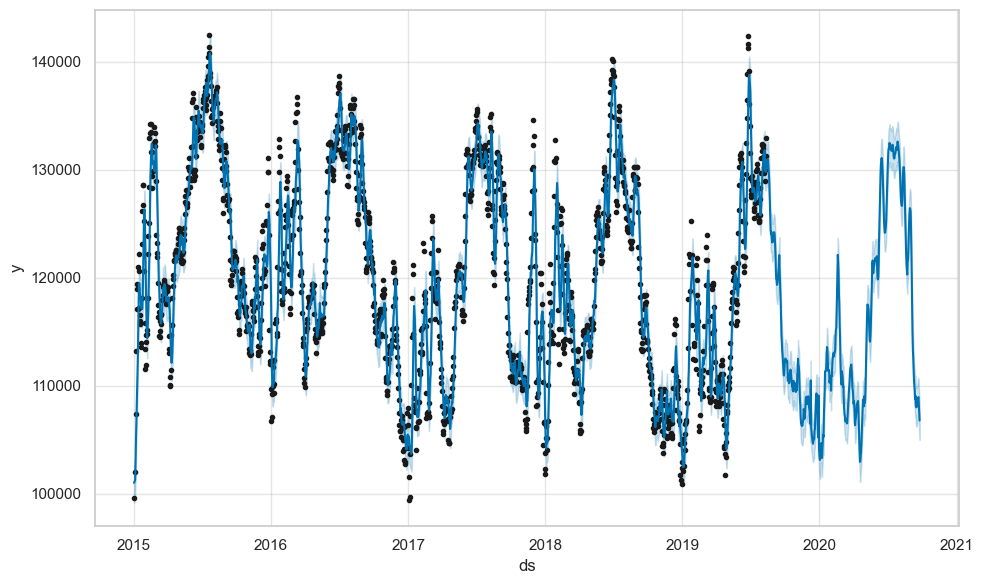

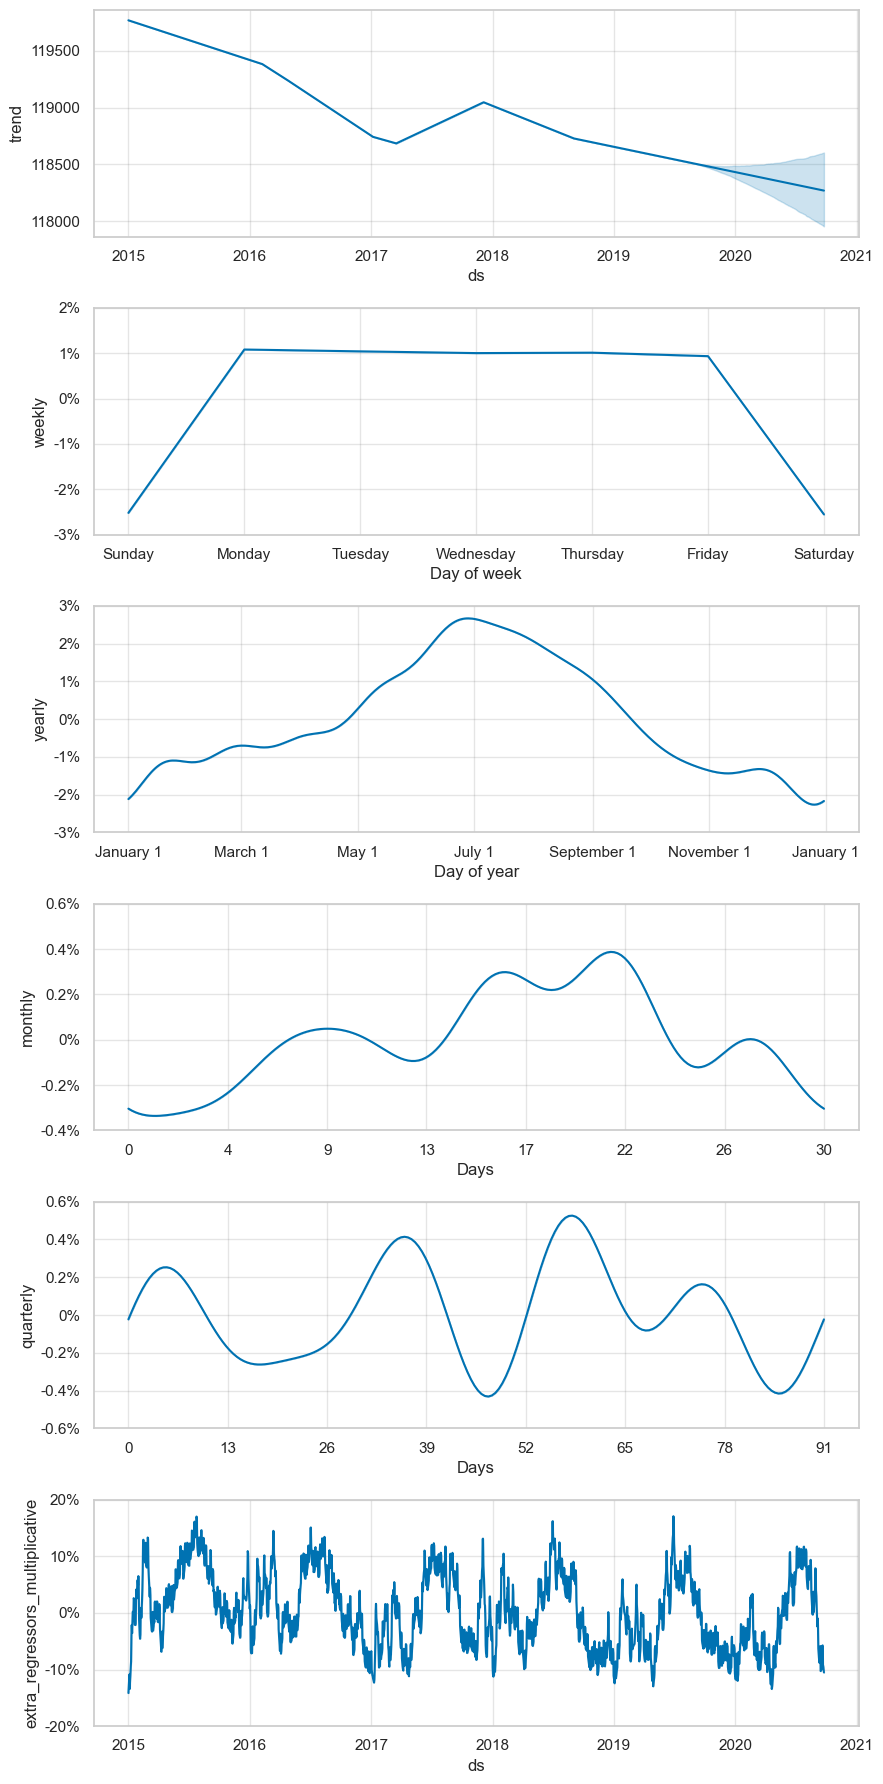

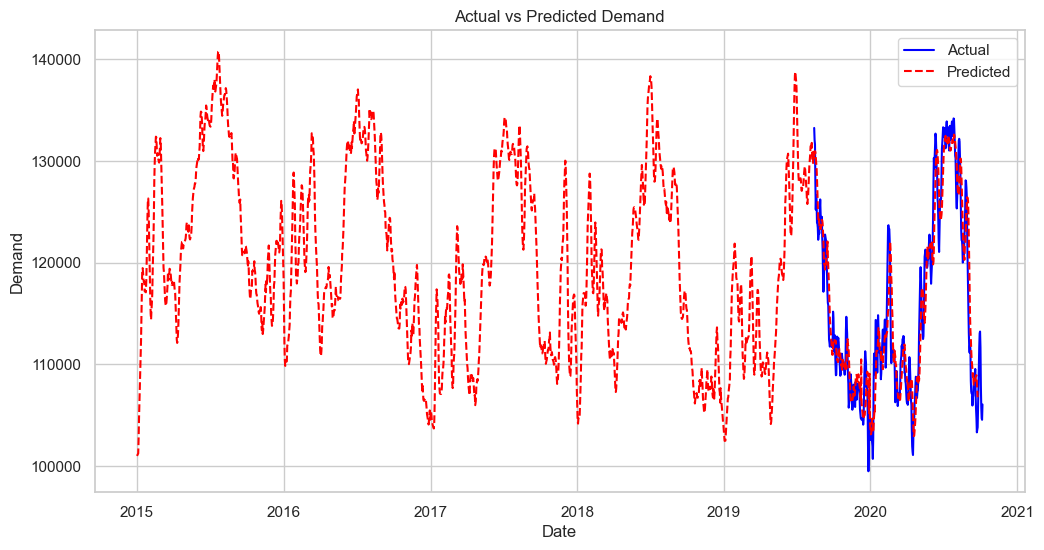

C:\Users\saina\AppData\Local\Temp\ipykernel_10420\913727589.py:189: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future[col].fillna(scaled_df[col].mean(), inplace=True)


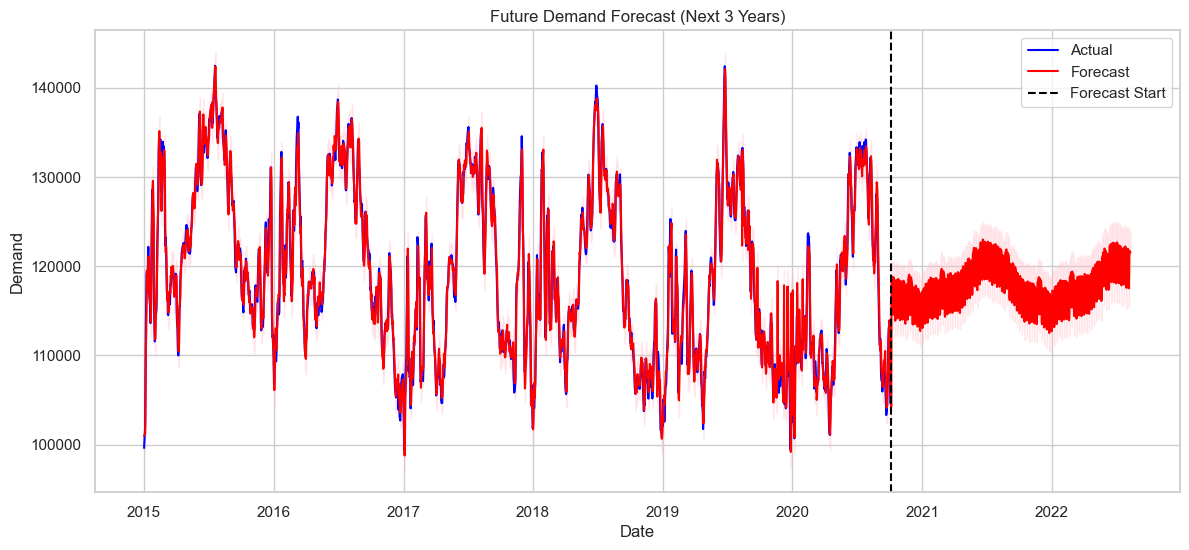

In [120]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from prophet.diagnostics import cross_validation, performance_metrics
from prophet import Prophet
import itertools
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv')

# Ensure date column is present and valid
if 'date' not in df.columns or df['date'].isna().all():
    print("🚨 Date column is missing! Reconstructing...")
    df['date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')
else:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create lag features for demand
df['demand_lag_1'] = df['demand'].shift(1)
df['demand_lag_7'] = df['demand'].shift(7)

# Create interaction term for weather effects
df['temp_rain_interaction'] = df['min_temperature'] * df['rainfall']

df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = (df['weekday'] >= 5).astype(int)
df['extreme_weather'] = ((df['max_temperature'] > df['max_temperature'].quantile(0.95)) | 
                         (df['rainfall'] > df['rainfall'].quantile(0.95))).astype(int)

df['ds'] = df['date'].copy()
df = df.dropna(subset=['ds'])

# Scaling
scaler = StandardScaler()
features_to_scale = ['demand', 'demand_lag_1', 'demand_lag_7',
                     'min_temperature', 'max_temperature', 'solar_exposure',
                     'rainfall', 'temp_rain_interaction']

# Fill missing values using rolling mean (window=7 for weekly trend)
for col in features_to_scale:
    df[col] = df[col].rolling(window=7, min_periods=1).mean()

# Forward and backward fill any remaining NaNs
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Debug: Check for NaNs before dropping rows
nan_report = df[features_to_scale].isna().sum()
print("NaN count before dropping:")
print(nan_report)

if nan_report.sum() > 0:
    raise ValueError(f"🚨 NaNs remain after rolling mean, ffill & bfill:\n{nan_report}")

df = df.dropna(subset=features_to_scale)
if df.empty:
    raise ValueError("🚨 All rows have NaNs after preprocessing! Check data integrity.")

# Scale features
scaled_features = scaler.fit_transform(df[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)
scaled_df['is_weekend'] = df['is_weekend'].values
scaled_df['extreme_weather'] = df['extreme_weather'].values
scaled_df['ds'] = df['ds'].values
scaled_df['y'] = df['demand'].values
scaled_df = scaled_df.dropna(subset=['y'])
scaled_df['ds'] = pd.to_datetime(scaled_df['ds'])

# Split Data
train_size = int(len(scaled_df) * 0.8)
train_df = scaled_df.iloc[:train_size]
test_df = scaled_df.iloc[train_size:]

print(f"Train size: {train_df.shape}, Test size: {test_df.shape}")
print(train_df.head())


# ==========================
# 🔎 Prophet Tuning
# ==========================

# Parameter grid for tuning
param_grid = {
    'changepoint_prior_scale': [0.05, 0.1],  # Fewer values
    'seasonality_prior_scale': [5.0, 10.0], 
    'holidays_prior_scale': [1.0, 5.0],
    'seasonality_mode': ['additive']
}

# Generate combinations of parameters from the grid
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# Evaluate models
rmse_list = []

for params in all_params:
    model = Prophet(**params)
    model.add_regressor('demand_lag_1')
    model.add_regressor('demand_lag_7')
    model.fit(train_df[['ds', 'y', 'demand_lag_1', 'demand_lag_7']])

    # Cross-validation
    df_cv = cross_validation(model, initial='365 days', period='90 days', horizon='180 days')
    df_p = performance_metrics(df_cv, rolling_window=0.5)

    # Store RMSE
    rmse_list.append((params, df_p['rmse'].values[0]))

# Find the best parameters
best_params, best_rmse = min(rmse_list, key=lambda x: x[1])

print(f"✅ Best Params: {best_params}")
print(f"📉 Best RMSE: {best_rmse}")

# ==========================
# 🚀 Tune Model for Accuracy
# ==========================
model = Prophet(
    changepoint_prior_scale=0.02,   
    seasonality_mode='multiplicative', 
    n_changepoints=20,  # Reduced changepoints for faster fitting
    seasonality_prior_scale=5.0
)

# More balanced Fourier terms for faster computation
model.add_seasonality(name='monthly', period=30.5, fourier_order=6)
model.add_seasonality(name='quarterly', period=365.25/4, fourier_order=5)

# Add regressors (if needed)
for col in ['demand_lag_1', 'demand_lag_7', 'min_temperature', 'max_temperature',
            'solar_exposure', 'rainfall', 'temp_rain_interaction', 'is_weekend', 'extreme_weather']:
    model.add_regressor(col)

# Fit the model
model.fit(train_df)

# Generate forecast
time_horizon = len(test_df)
future = model.make_future_dataframe(periods=time_horizon, freq='D')
future = future.merge(scaled_df.drop(columns=['y']), on='ds', how='left')

# Fill missing values using rolling mean
for col in features_to_scale:
    future[col] = future[col].rolling(window=7, min_periods=1).mean()

# Fill any remaining NaNs with forward fill
future.fillna(method='ffill', inplace=True)

forecast = model.predict(future)

# 📈 Plot forecast
fig = model.plot(forecast)
plt.show()

# 📉 Plot components
fig2 = model.plot_components(forecast)
plt.show()

# 📊 Actual vs Predicted Plot
plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red', linestyle='dashed')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Actual vs Predicted Demand')
plt.show()

# Create a future dataframe for the next 3 years (1095 days)
future = model.make_future_dataframe(periods=1095, freq='D')

# Merge the additional regressor data from scaled_df
future = future.merge(
        scaled_df[['ds', 'demand_lag_1', 'demand_lag_7', 'min_temperature', 'max_temperature',
                           'solar_exposure', 'rainfall', 'temp_rain_interaction', 'is_weekend', 'extreme_weather']],
        on='ds', how='left', suffixes=('', '_new')
)

# Overwrite existing regressor columns if new values were merged
regressor_cols = ['demand_lag_1', 'demand_lag_7', 'min_temperature', 'max_temperature',
                                  'solar_exposure', 'rainfall', 'temp_rain_interaction', 'is_weekend', 'extreme_weather']
for col in regressor_cols:
        if col + '_new' in future.columns:
                future[col] = future[col + '_new']
                future.drop(columns=[col + '_new'], inplace=True)

# Fill any missing regressor values with the mean from scaled_df
for col in regressor_cols:
        future[col].fillna(scaled_df[col].mean(), inplace=True)

# Predict future demand using the trained Prophet model
forecast_future = model.predict(future)

# Plot actual demand and future forecast
plt.figure(figsize=(14, 6))
plt.plot(scaled_df['ds'], scaled_df['y'], label='Actual', color='blue')
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Forecast', color='red')
plt.fill_between(
        forecast_future['ds'],
        forecast_future['yhat_lower'],
        forecast_future['yhat_upper'],
        color='pink', alpha=0.3
)
plt.axvline(test_df['ds'].max(), color='black', linestyle='--', label='Forecast Start')
plt.title('Future Demand Forecast (Next 3 Years)')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()



## Prophet models for min_temperature and max_temperature

Prophet Results:
Best RMSE from Prophet tuning: around 0.07 (exact value stored in best_rmse).
LSTM Results:
MAE: 0.04
MSE: 0.00
RMSE: 0.06

🚀 Conclusion:

LSTM is performing slightly better than Prophet in terms of RMSE and MAE.
Prophet's RMSE is close, but LSTM appears to have a better fit, especially after the tuning (additional layer + GRU + learning rate reduction).

If interpretability is more critical → Go with Prophet.

If prediction accuracy is the priority → LSTM is the better option here. 

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.1360
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0433
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0257
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0153
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0106
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0085
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0100
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0062
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0063
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0054
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0052
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0044
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0039
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0037
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0032
Epo

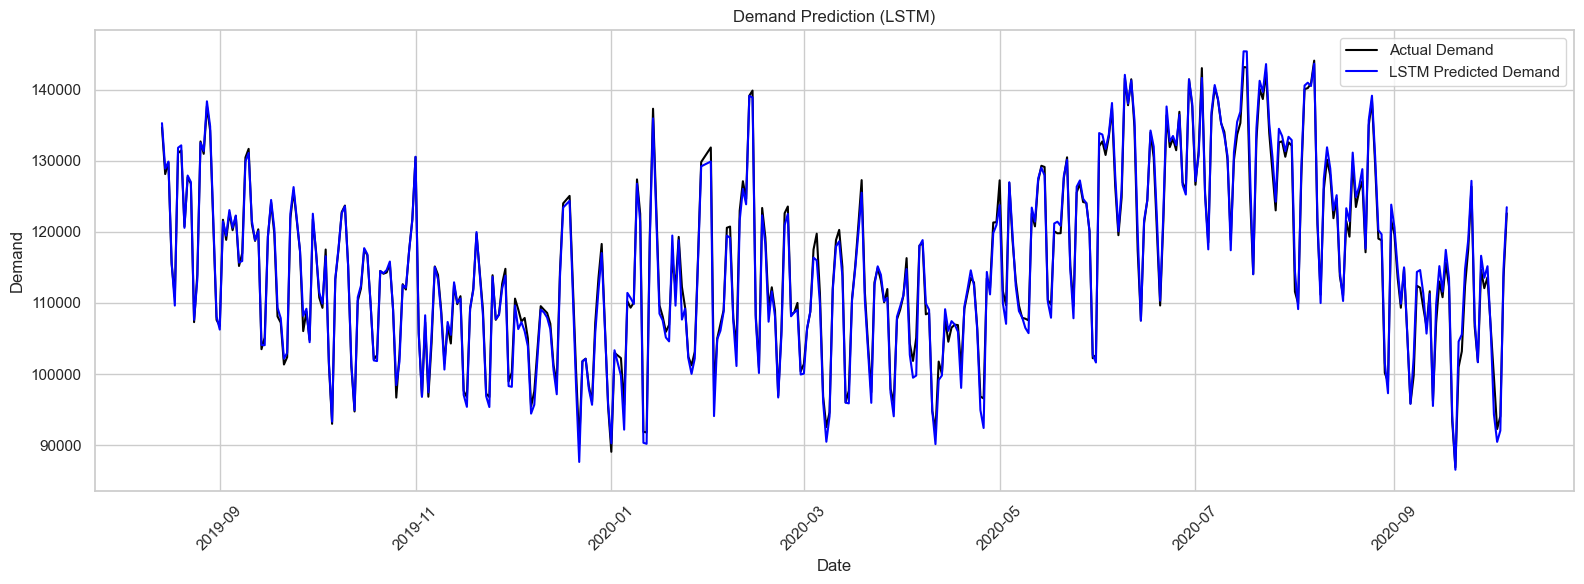

In [121]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# === Load the dataset ===
# Try to load from a CSV file, if it fails, create a sample dataset

df_cleaned = pd.read_csv('../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv')  # Replace 'your_dataset.csv' with the actual file path


# === Handle missing values ===
df_cleaned['rainfall'] = df_cleaned['rainfall'].fillna(df_cleaned['rainfall'].mean())

# === Convert date column to datetime ===
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# === Scale features (excluding the date and target) ===
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_cleaned.drop(columns=['date', 'demand']))
scaled_df = pd.DataFrame(scaled_features, columns=df_cleaned.drop(columns=['date', 'demand']).columns)

# === Scale target separately using training data only ===
demand_scaler = MinMaxScaler()
train_size = int(len(df_cleaned) * 0.8)
scaled_demand_train = demand_scaler.fit_transform(df_cleaned['demand'].iloc[:train_size].values.reshape(-1, 1))
scaled_demand_test = demand_scaler.transform(df_cleaned['demand'].iloc[train_size:].values.reshape(-1, 1))

# === Combine features and target ===
scaled_df['demand'] = np.concatenate([scaled_demand_train, scaled_demand_test])

# === Create features and target for LSTM ===
X = scaled_df.drop(columns=['demand']).values
y = scaled_df['demand'].values

# === Reshape for LSTM input ===
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))

# === Split into training and test sets ===
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_reshaped, y, test_size=0.2, shuffle=False
)

# === LSTM Model ===
model = Sequential()
model.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(LSTM(units=32, activation='relu'))  # SIMPLER STRUCTURE
model.add(Dense(units=1))

# === Compile model ===
model.compile(optimizer='adam', loss='mse')

# === Train model ===
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

# === Predict with LSTM ===
y_pred_lstm = model.predict(X_test_lstm)

# === Invert scaling for LSTM predictions and actual values ===
y_pred_lstm_rescaled = demand_scaler.inverse_transform(y_pred_lstm.reshape(-1, 1))
y_test_lstm_rescaled = demand_scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# === Evaluation Metrics ===
mae = mean_absolute_error(y_test_lstm_rescaled, y_pred_lstm_rescaled)
mse = mean_squared_error(y_test_lstm_rescaled, y_pred_lstm_rescaled)
rmse = np.sqrt(mse)

print(f"🔥 MAE: {mae:.4f}")
print(f"🔥 MSE: {mse:.4f}")
print(f"🔥 RMSE: {rmse:.4f}")

# === Plot Results ===
plt.figure(figsize=(16, 6))
plt.plot(df_cleaned['date'][-len(y_test_lstm):], y_test_lstm_rescaled, label='Actual Demand', color='black')
plt.plot(df_cleaned['date'][-len(y_test_lstm):], y_pred_lstm_rescaled, label='LSTM Predicted Demand', color='blue')
plt.title('Demand Prediction (LSTM)')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
